# CENG 3516 STATISTICAL COMPUTING FINAL PROJECT

## Gizem Kurnaz -  170709059

### Topic : IBB City Theaters

### Abstarct:
 My aim in this project was to measure the interest felt by people according to the type and category of the play in the theater plays in Istanbul. Therefore, I examined and anaysed three dataset of IBB and made inferences.

### Dataset:
I used 3 datasets in this project. These datasets are about the theaters in Istanbul and the plays in those theaters. I used the number of audiences as numeric data in the first dataset, the number of plays in the second dataset, and the occupancy rate of the theater in the third dataset.

1-) https://data.ibb.gov.tr/dataset/sehir-tiyatrolari-veri-seti/resource/79465ce9-8755-4b57-8e6c-def0c0caadc8

2-) https://data.ibb.gov.tr/dataset/2017-2019-ibb-sehir-tiyatrolari-oynanan-oyun-sayilari/resource/311f8744-8c9c-4f11-ad80-cfe59f761689

3-) https://data.ibb.gov.tr/dataset/ibb-sehir-tiyatrolarinda-sergilen-oyunlar/resource/94a0b292-b5f5-454a-b91e-da6000b528fc

### Importing Libraries

In [204]:
library(ggplot2)
library(MASS)
library(plyr)
library(nortest)
library("dplyr")

### Loading Data

In [208]:
df <- read.csv('theater_play.csv', fileEncoding="UTF-8-BOM")
df2 <- read.csv('yl-baznda-oyun-says.csv', fileEncoding="UTF-8-BOM")
df3 <- read.csv('2018-2020-oyun-bazli-izleyici-sayisi-seans-sayisi-ve-doluluk-orani.csv', fileEncoding="UTF-8-BOM")

### Part 1 (First Dataset )

### Data Exploration & Preprocessing

In [209]:
head(df)

PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,IS_GUEST_PLAY,PLAY_TYPE,LONGITUDE,LATITUDE,NUMBER_OF_AUDIENCE
2017-12-27,KARAGÖZ' ÜN UYKUSU,Gaziosmanpaşa Ferih Egemen Çocuk Tiyatrosu Sahnesi,Çocuk,0,Yerli,28.91648,41.05785,50
2019-03-28,ŞAHANE ZÜĞÜRTLER,Kadıköy Haldun Taner Sahnesi,Yetişkin,0,Yabancı,29.02341,40.99177,1
2017-11-30,BAK BİZİM ŞARKIMIZI ÇALIYORLAR,Kağıthane Sadabad Sahnesi,Müzikal,0,Yabancı,28.97097,41.07937,84
2020-01-24,ÇIN SABAHTA,Gaziosmanpaşa Sahnesi,Yetişkin,0,Yerli,28.91648,41.05785,46
2019-01-27,POLLYANNA,Kağıthane Sadabad Sahnesi,Çocuk,0,Yabancı,28.97097,41.07937,150
2018-11-25,BENİM GÜZEL PABUÇLARIM,Kağıthane Sadabad Sahnesi,Çocuk,0,Yerli,28.97097,41.07937,127


First dataset consists of 9 columns, these are the date of the play, the name of the play, the name of the theater, the category of the play, whether the play belongs to that theater or is it a guest play, the type of play, the latitude and longitude of the theater and the number of spectators of the play.

In [210]:
colnames(df) <- c("date", "name", "theater_name","category", 
    "is_guest_play", "type", "longitude", "latitude", "audience")

In [211]:
df <- transform(df, is_guest_play = as.factor(mapvalues(is_guest_play, c(0,1), c("hayır","evet"))))

In [212]:
head(df)

date,name,theater_name,category,is_guest_play,type,longitude,latitude,audience
2017-12-27,KARAGÖZ' ÜN UYKUSU,Gaziosmanpaşa Ferih Egemen Çocuk Tiyatrosu Sahnesi,Çocuk,hayır,Yerli,28.91648,41.05785,50
2019-03-28,ŞAHANE ZÜĞÜRTLER,Kadıköy Haldun Taner Sahnesi,Yetişkin,hayır,Yabancı,29.02341,40.99177,1
2017-11-30,BAK BİZİM ŞARKIMIZI ÇALIYORLAR,Kağıthane Sadabad Sahnesi,Müzikal,hayır,Yabancı,28.97097,41.07937,84
2020-01-24,ÇIN SABAHTA,Gaziosmanpaşa Sahnesi,Yetişkin,hayır,Yerli,28.91648,41.05785,46
2019-01-27,POLLYANNA,Kağıthane Sadabad Sahnesi,Çocuk,hayır,Yabancı,28.97097,41.07937,150
2018-11-25,BENİM GÜZEL PABUÇLARIM,Kağıthane Sadabad Sahnesi,Çocuk,hayır,Yerli,28.97097,41.07937,127


In [213]:
summary(df)

         date                                 name      
 2019-12-17:  127   KARINCALAR - BİR SAVAŞ VARDI: 1025  
 2019-12-18:  124   NORA - BİR BEBEK EVİ        :  884  
 2019-12-19:  121   KAHVEDE ŞENLİK VAR          :  846  
 2019-12-21:  116   ŞAHANE ZÜĞÜRTLER            :  763  
 2019-12-20:  114   MATRUŞKA                    :  735  
 2019-12-22:  113   BEN ÇAĞIRMADIM              :  706  
 (Other)   :26577   (Other)                     :22333  
                            theater_name      category     is_guest_play
 Kağıthane Sadabad Sahnesi        :3553   Çocuk   : 7415   evet : 1136  
 Fatih Reşat Nuri Sahnesi         :3364   Müzikal : 2528   hayır:26156  
 Gaziosmanpaşa Sahnesi            :3347   Yetişkin:17349                
 Ümraniye Sahnesi                 :3260                                 
 Harbiye Muhsin Ertuğrul Sahnesi  :3200                                 
 Üsküdar Musahipzade Celãl Sahnesi:2925                                 
 (Other)                         

In [214]:
summary(df$type)

Yabancı   Yerli 
  11572   15720

In [215]:
summary(df$category)

Çocuk  Müzikal Yetişkin 
    7415     2528    17349

In [216]:
summary(df$audience)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    11.0    32.0    66.2    67.0  3585.0 

### Data visualization and Descriptive Stats

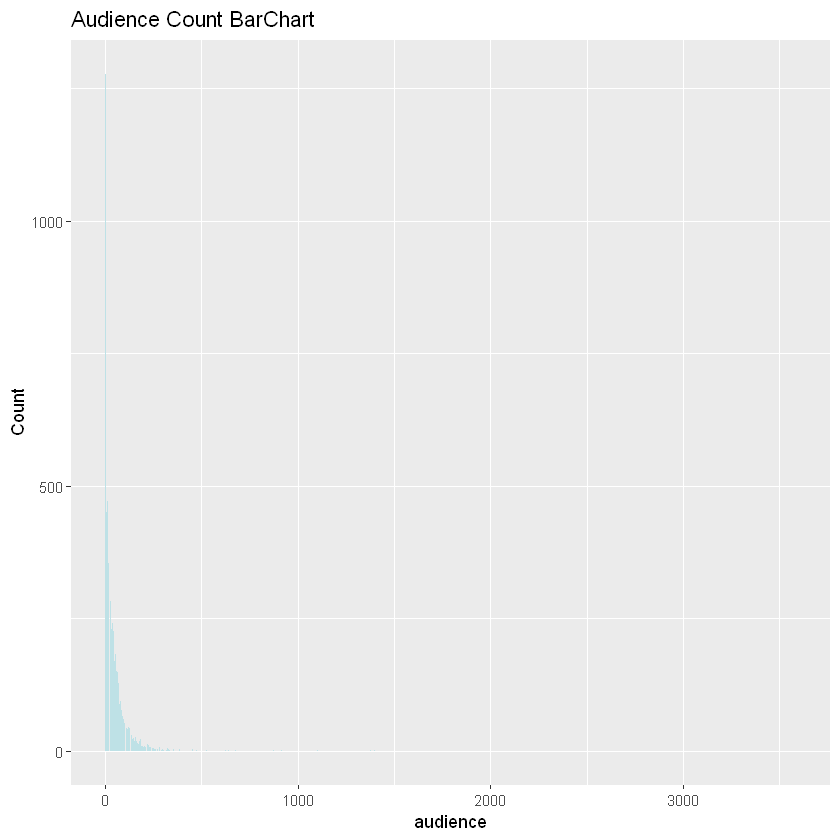

In [217]:
ggplot(data=df, aes(x=audience)) +
  geom_bar(fill="#bee1e6")+
  labs(title = "Audience Count BarChart", x="audience", y="Count")

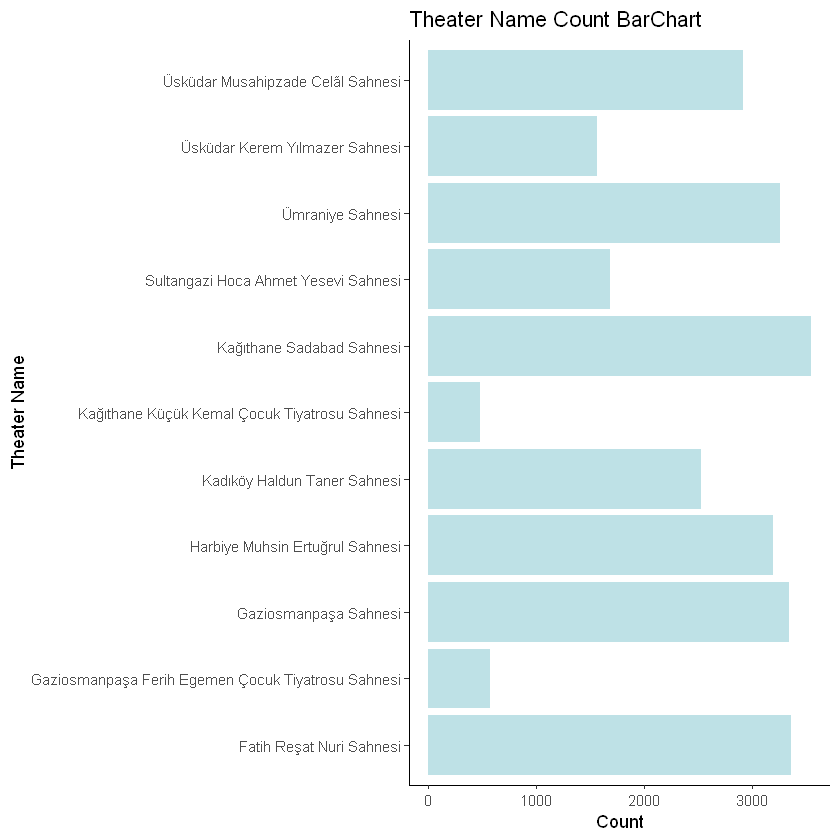

In [218]:
line<-filter(summarise(group_by(df,theater_name), count=length(theater_name)),count>200)

ggplot(line,aes(x=theater_name,y=count))+geom_col(fill='#bee1e6')+coord_flip()+theme_classic() +labs(title = "Theater Name Count BarChart", x="Theater Name", y="Count")

In [14]:
summary(df[df$type=="Yerli", 9])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   30.00   62.34   64.00 3013.00 

In [15]:
summary(df[df$type=="Yabancı", 9])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   12.00   33.00   71.45   70.00 3585.00 

### Exploration of number of audience based on play type

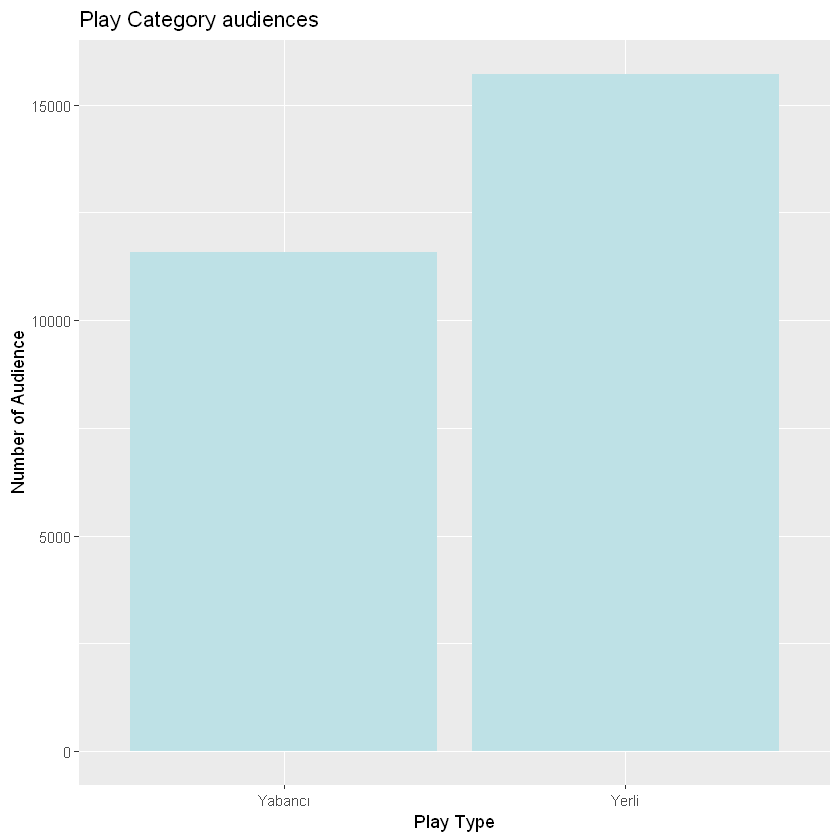

In [16]:
ggplot(data=df, aes(x=type),aes(y=audience))+
  geom_bar(fill="#bee1e6")+
  labs(title = "Play Category audiences", x="Play Type", y="Number of Audience")

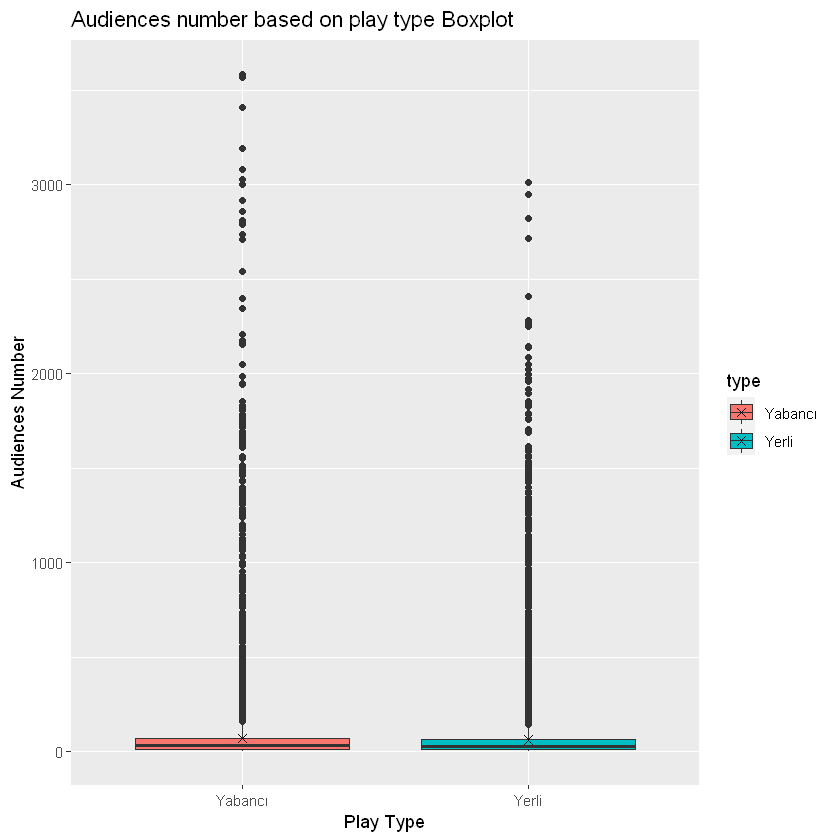

In [141]:
ggplot(data=df, aes(x=type, y=audience, fill= type)) +
  geom_boxplot() + 
  labs(title = "Audiences number based on play type Boxplot", x = "Play Type", y="Audiences Number") +
  stat_summary(fun=mean, geom="point", shape=4, size=2)

### Exploration of number of audience based on play category

In [18]:
summary(df[df$category=="Çocuk", 9])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   32.00   61.85   73.00 2023.00 

In [19]:
summary(df[df$category=="Müzikal", 9])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    17.0    44.0   100.5    88.0  3568.0 

In [20]:
summary(df[df$category=="Yetişkin", 9])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   11.00   30.00   63.06   62.00 3585.00 

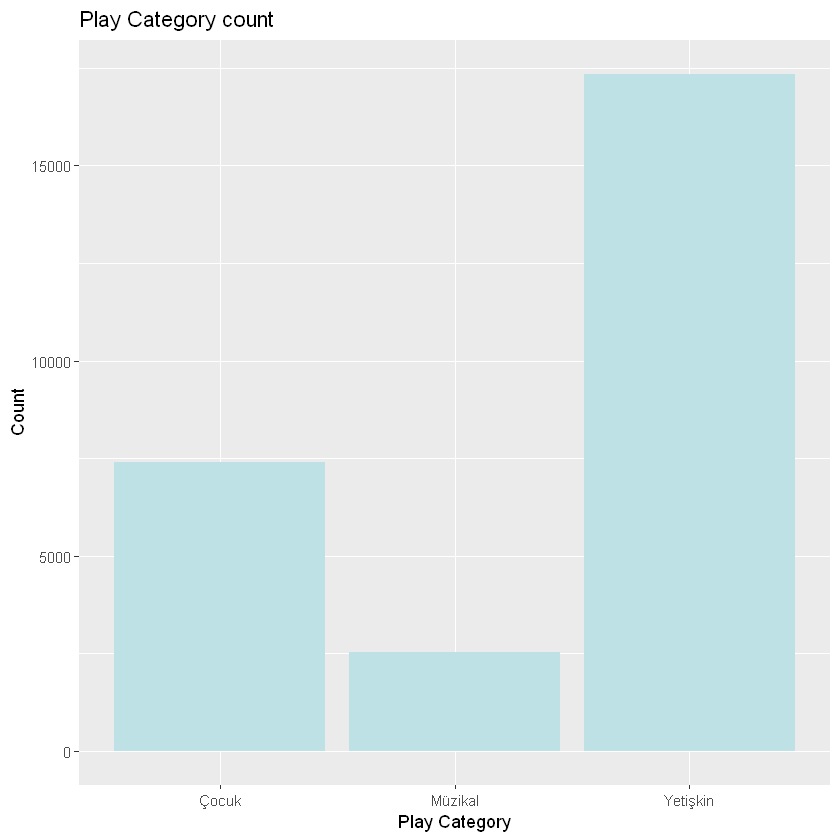

In [140]:
ggplot(data=df, aes(x=category))+
  geom_bar(fill="#bee1e6")+
  labs(title = "Play Category count", x="Play Category", y="Count")

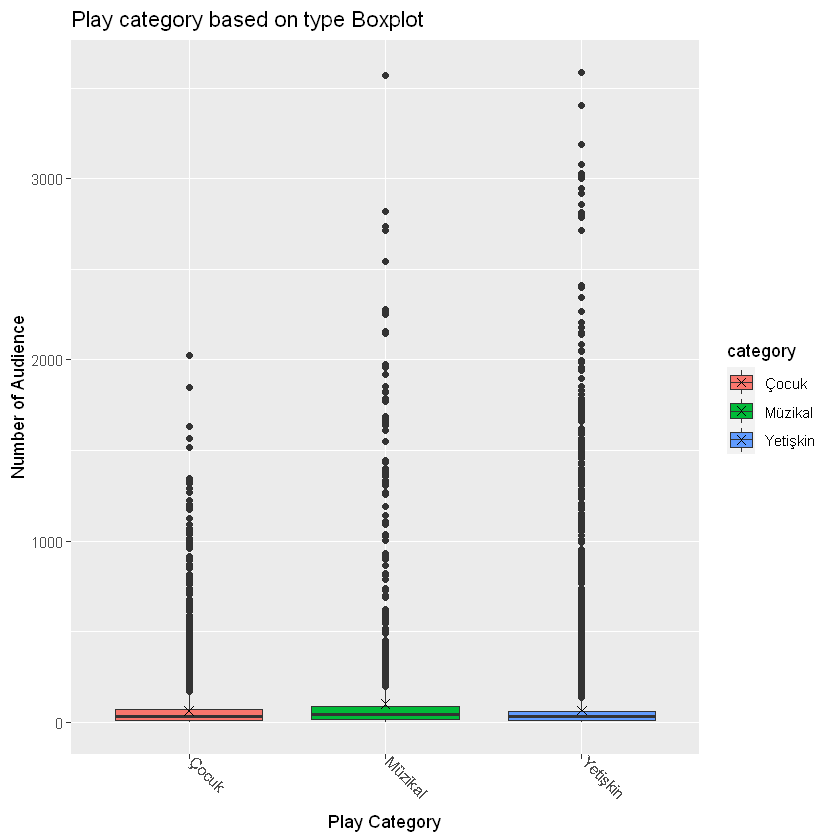

In [22]:
ggplot(data=df, aes(x=category, y=audience, fill= category)) +
  geom_boxplot() + 
  labs(title = "Play category based on type Boxplot", x = "Play Category", y="Number of Audience") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

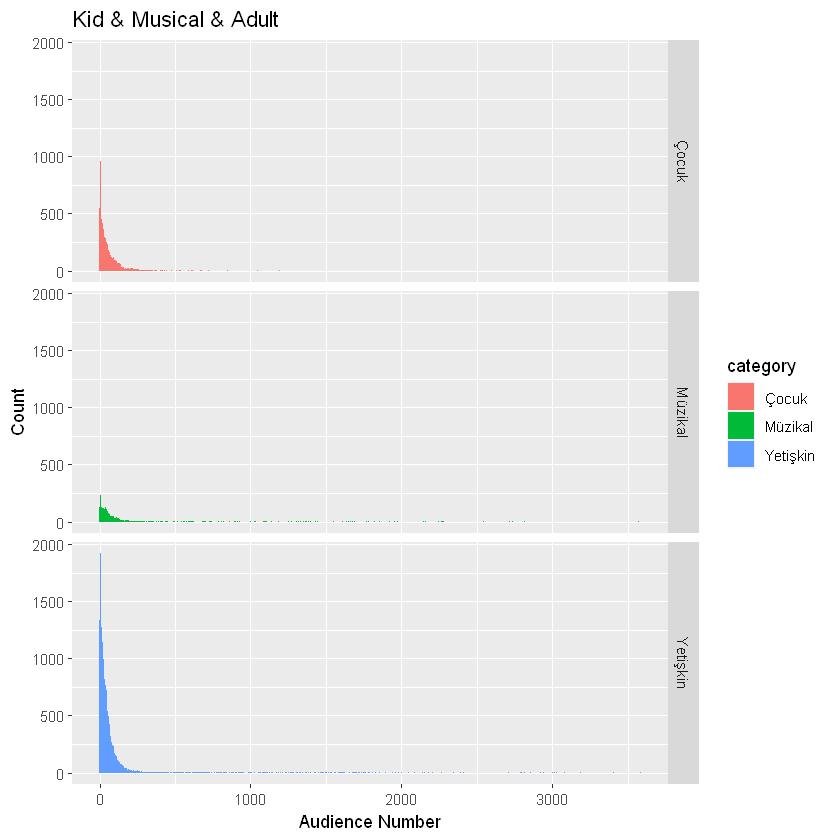

In [23]:
ggplot(df, aes(audience, fill=category)) + 
  geom_histogram(position="identity", binwidth=5) +
  facet_grid(category ~ .) + 
  ggtitle("Kid & Musical & Adult") +
  xlab("Audience Number") + 
  ylab("Count")

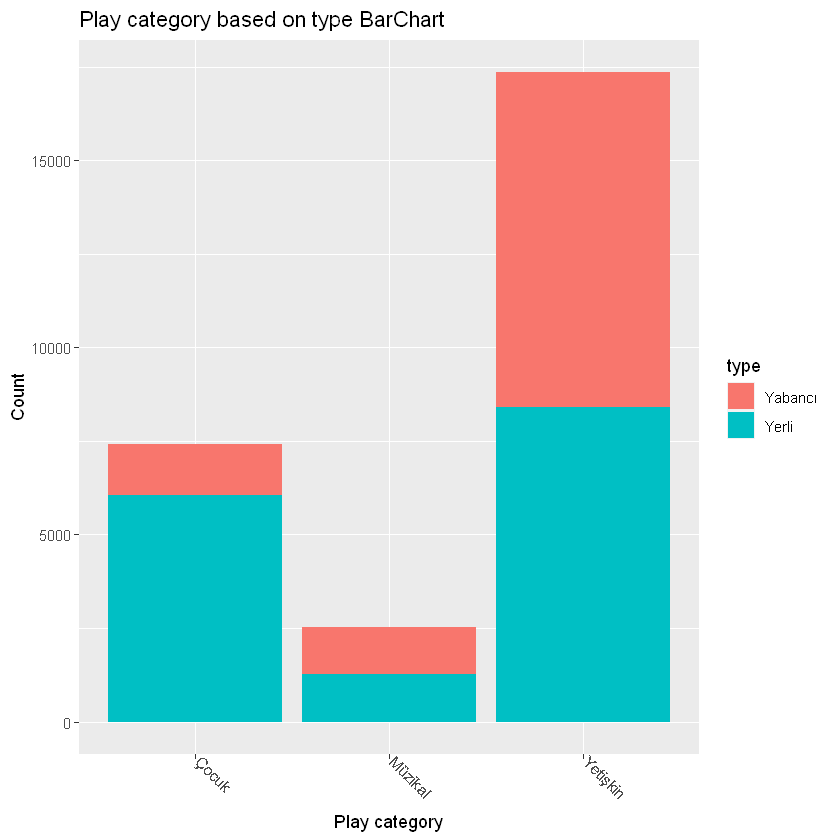

In [24]:
ggplot(df, aes(x=category, fill=type))+
  geom_bar() + 
  labs(title = "Play category based on type BarChart",x= "Play category",y= "Count") +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

### Confidence Interval

#### 1-) Confidence interval for audience number evaluating the differences based on play category.

In [25]:
kid<- subset(df, category=="Çocuk")
musical <- subset(df, category=="Müzikal")
adult <- subset(df, category=="Yetişkin")

In [26]:
x <- t.test(kid$audience)$conf.int
x

[1] 59.23373 64.46553
attr(,"conf.level")
[1] 0.95

The true average of audience number for kid plays is between 59.23 and 64.46 with 95% confidence.

In [27]:
y <- t.test(musical$audience)$conf.int
y

[1]  90.56926 110.52172
attr(,"conf.level")
[1] 0.95

The true average of audience number for musical plays is between 90.56 and 110.52 with 95% confidence.

In [28]:
z <- t.test(adult$audience)$conf.int
z

[1] 60.54820 65.56824
attr(,"conf.level")
[1] 0.95

The true average of audience number for musical plays is between 60.54 and 65.56 with 95% confidence.

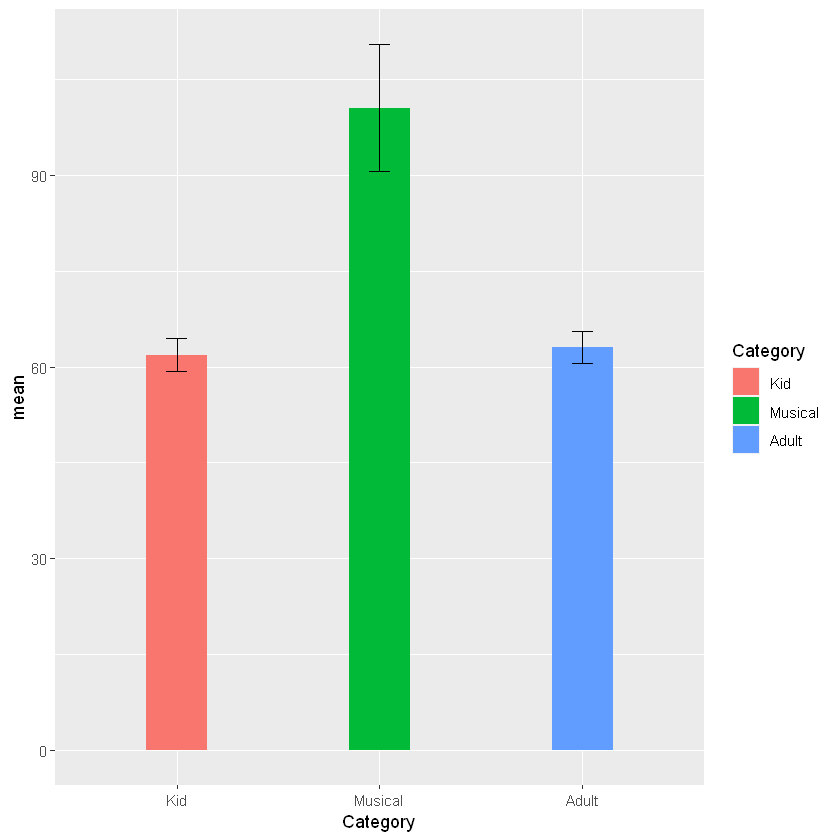

In [29]:
play.audience <- data.frame(Category="Kid",
                                mean=mean(kid$audience), 
                                lower=x[1], 
                                upper=x[2])

play.audience <- rbind(play.audience , data.frame(Category="Musical",
                                mean=mean(musical$audience), 
                                lower=y[1], 
                                upper=y[2]))

play.audience <- rbind(play.audience , data.frame(Category="Adult",
                                mean=mean(adult$audience), 
                                lower=z[1], 
                                upper=z[2]))

ggplot(play.audience, aes(x=Category, y=mean, fill=Category)) +
  geom_bar(position="dodge", stat="identity", width = 0.3) +
  geom_errorbar(aes(ymin=lower, ymax=upper),
                width=.1, 
                position=position_dodge(0.1))

#### 2-) Confidence interval for audience number evaluating the differences based on play type.

In [30]:
domestic<- subset(df, type=="Yerli")
foreign <- subset(df, type=="Yabancı")

In [31]:
x <- t.test(domestic$audience)$conf.int
x

[1] 59.99695 64.67684
attr(,"conf.level")
[1] 0.95

The true average of audience number for kid plays is between 59.99 and 64.67 with 95% confidence.

In [32]:
y <- t.test(foreign$audience)$conf.int
y

[1] 68.03405 74.87210
attr(,"conf.level")
[1] 0.95

The true average of audience number for kid plays is between 68.03 and 74.87 with 95% confidence.

To conclude, It looks there is no overlap between domestic and foreign play's audiences confidence interval.

Let's we visualize;

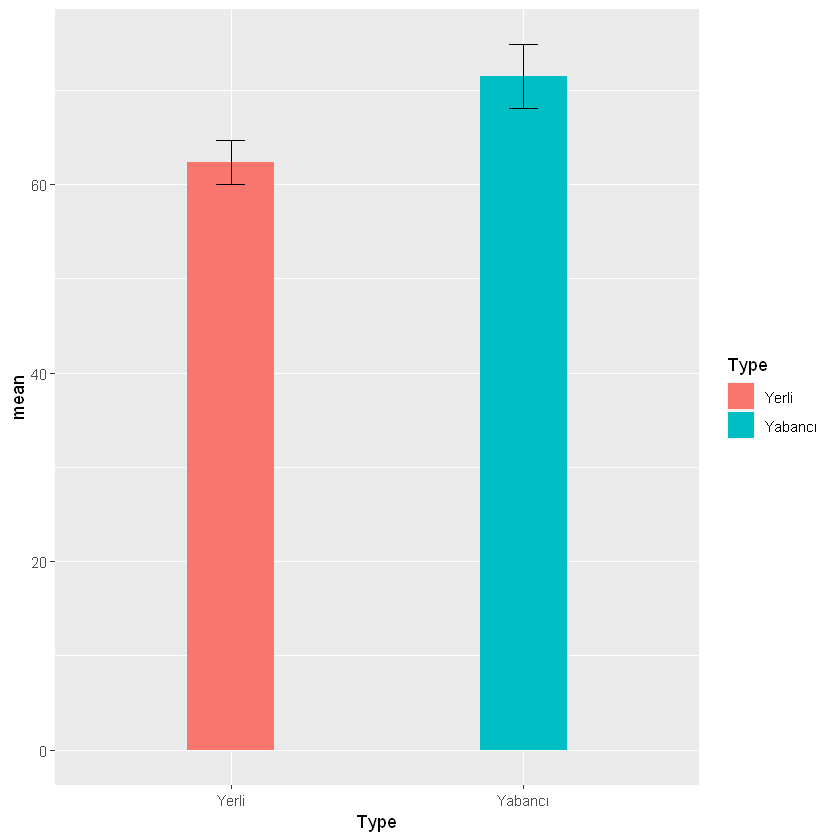

In [33]:
play.audience <- data.frame(Type="Yerli",
                                mean=mean(domestic$audience), 
                                lower=x[1], 
                                upper=x[2])

play.audience <- rbind(play.audience , data.frame(Type="Yabancı",
                                mean=mean(foreign$audience), 
                                lower=y[1], 
                                upper=y[2]))

ggplot(play.audience, aes(x=Type, y=mean, fill=Type)) +
  geom_bar(position="dodge", stat="identity", width = 0.3) +
  geom_errorbar(aes(ymin=lower, ymax=upper),
                width=.1,
                position=position_dodge(0.1))

## Hypothesis testing
### One Sample Test

#### 1-) One sample hypothesis for mean of number of audiences for category of play is Çocuk and testing it with 95% confidence interval.

H0:μ = 63

H1:μ != 63

In order to assess normality of data, used qqplot and Anderson-Darling test.

In [34]:
ad.test(kid$audience)


	Anderson-Darling normality test

data:  kid$audience
A = 966.84, p-value < 2.2e-16


As the p-value < 0.05, the null hypothesis is rejected, so data is not normally distributed.

Let’s visualize it using Q-Q Plot.

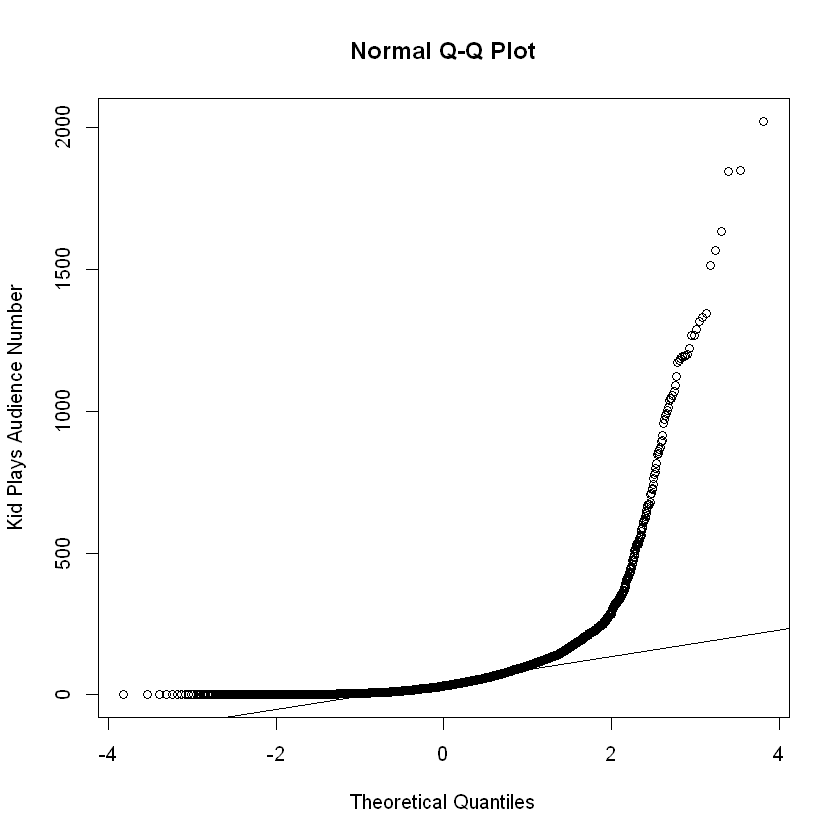

In [35]:
qqnorm(kid$audience, ylab = "Kid Plays Audience Number")
qqline(kid$audience)

In [36]:
t.test(kid$audience, 
       alternative = "two.sided", 
       mu=63, 
       conf.level = 0.95)


	One Sample t-test

data:  kid$audience
t = -0.86206, df = 7414, p-value = 0.3887
alternative hypothesis: true mean is not equal to 63
95 percent confidence interval:
 59.23373 64.46553
sample estimates:
mean of x 
 61.84963 


To conclude, as p-value > 0.05, the null hypothesis is not rejected and the confidence interval is between 59.23 and 64.46 with 95% confident

#### 2-) One sample hypothesis for mean of number of audiences for type of play is Yabancı and testing it with 95% confidence interval.

H0:μ = 70

H1:μ > 70

In order to assess normality of data,used qqplot and Anderson-Darling test.

In [37]:
ad.test(foreign$audience)


	Anderson-Darling normality test

data:  foreign$audience
A = 2314.7, p-value < 2.2e-16


As the p-value < 0.05, the null hypothesis is rejected, so data is not normally distributed

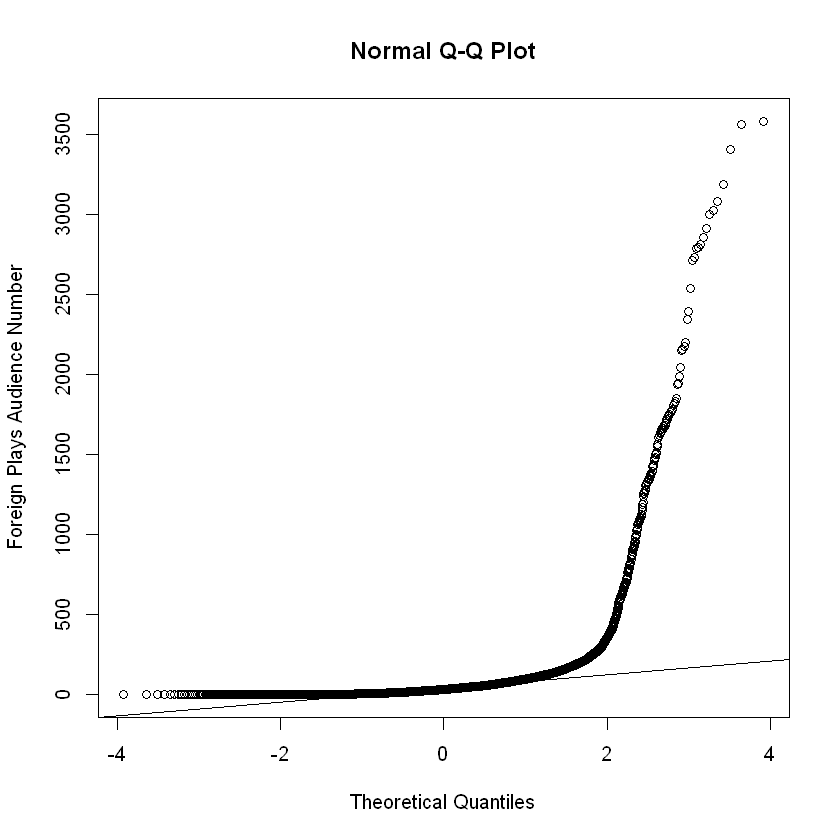

In [38]:
qqnorm(foreign$audience, ylab = "Foreign Plays Audience Number")
qqline(foreign$audience)

In [39]:
t.test(foreign$audience, 
       alternative = "less", 
       mu=70, 
       conf.level = 0.95)


	One Sample t-test

data:  foreign$audience
t = 0.83307, df = 11571, p-value = 0.7976
alternative hypothesis: true mean is less than 70
95 percent confidence interval:
     -Inf 74.32234
sample estimates:
mean of x 
 71.45308 


To conclude, as p-value > 0.05, the null hypothesis is not rejected and the confidence interval is between -infinity and 74.32 with 95% confident

### Two Sample Test

#### Are there significant difference between mean of kid and adult plays audience number?

Let’s check if the populations have the same variance.

In [40]:
x <- subset(df, category=="Müzikal")$audience
y <- subset(df, category=="Yetişkin")$audience
var.test(x, y)


	F test to compare two variances

data:  x and y
F = 2.3, num df = 2527, denom df = 17348, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.169577 2.441448
sample estimates:
ratio of variances 
          2.299987 


As p-value < 0.05, the null hypothesis is rejected and the variances are not equal.

In order to assess normality of data, we can use qqplot and shapiro test.

In [41]:
ad.test(musical$audience)


	Anderson-Darling normality test

data:  musical$audience
A = 536.42, p-value < 2.2e-16


As the p-value < 0.05, the null hypothesis is rejected, so data is not normally distributed.

In [42]:
ad.test(adult$audience)


	Anderson-Darling normality test

data:  adult$audience
A = 3528.3, p-value < 2.2e-16


As the p-value < 0.05, the null hypothesis is rejected, so data is not normally distributed.

In [43]:
t.test(x=x, y=y, alternative = "two.sided", var.equal = TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  x and y
t = 9.6712, df = 19875, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 29.88967 45.08488
sample estimates:
mean of x mean of y 
100.54549  63.05822 


To conclude, as p-value < 0.05, the null hypothesis is rejected. We can conclude that there is not statistically significant difference between musical and adult plays audiences.

### ANOVA

#### Are there significant difference between mean of number of audience for different play category?

In [44]:
data <- df[, c(4, 9)]
names(data) <- c("categories", "audience")
head(data)

categories,audience
Çocuk,50
Yetişkin,1
Müzikal,84
Yetişkin,46
Çocuk,150
Çocuk,127


In [45]:
levels(data$categories)

[1] "Çocuk"    "Müzikal"  "Yetişkin"

In [46]:
group_by(data, categories) %>%
  summarise(
    count = n(),
    mean = mean(audience, na.rm = TRUE),
    sd = sd(audience, na.rm = TRUE)
  )

categories,count,mean,sd
Çocuk,7415,61.84963,114.9100
Müzikal,2528,100.54549,255.7990
Yetişkin,17349,63.05822,168.6693


##### Hypothesis:
H0: μ1=μ2=μ3

H1: At least one is different

##### Visualization

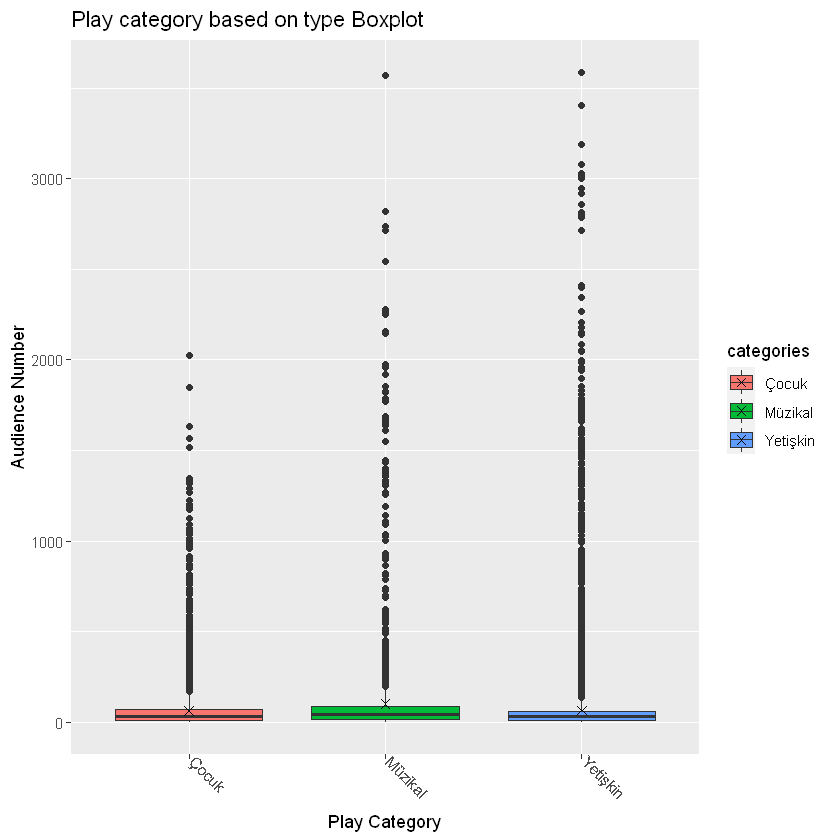

In [47]:
ggplot(data=data, aes(x=categories, y=audience, fill= categories)) +
  geom_boxplot() + 
  labs(title = "Play category based on type Boxplot", x = "Play Category", y="Audience Number") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

##### Normality Assumption

We will check normality assumption by Anderson-Darling-test.

In [48]:
ad.test(data[data$categories=="Çocuk", 2])


	Anderson-Darling normality test

data:  data[data$categories == "Çocuk", 2]
A = 966.84, p-value < 2.2e-16


In [49]:
ad.test(data[data$categories=="Yetişkin", 2])


	Anderson-Darling normality test

data:  data[data$categories == "Yetişkin", 2]
A = 3528.3, p-value < 2.2e-16


In [50]:
ad.test(data[data$categories=="Müzikal", 2])


	Anderson-Darling normality test

data:  data[data$categories == "Müzikal", 2]
A = 536.42, p-value < 2.2e-16


#### Variance homogeneity

In [51]:
bartlett.test(audience~categories, data=data)


	Bartlett test of homogeneity of variances

data:  audience by categories
Bartlett's K-squared = 2889.2, df = 2, p-value < 2.2e-16


Based on output of barlett-test, p-value < 0.05 So, the null hypothesis is rejected and variances are not equal.

##### Analysis of variance

In [52]:
model<-aov(audience~categories, data=data)
summary(model)

               Df    Sum Sq Mean Sq F value Pr(>F)    
categories      2   3293644 1646822   59.38 <2e-16 ***
Residuals   27289 756785433   27732                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value < 0.05, we can conclude that there is significant differences between the categories plays audience number.

## Part 2 (Second Dataset)

### Data Exploration & Preprocessing

In [53]:
head(df2)

Tarih,Yerli.Oyun.sayısı,Yabancı.Oyun.Sayısı,Kategori
2017,14,11,Yetişkin Ve Müzikal
2018,18,15,Yetişkin Ve Müzikal
2019,16,19,Yetişkin Ve Müzikal
2020,14,14,Yetişkin Ve Müzikal
2017,8,3,Çocuk
2018,14,3,Çocuk


The second dataset consists of four lines, these are the date, the number of domestic plays, the number of foreign plays and the category of the play.

In [54]:
colnames(df2) <- c("year", "domestic_play_number", "foreign_play_number","category")

In [55]:
summary(df2)

      year      domestic_play_number foreign_play_number
 Min.   :2017   Min.   : 8.00        Min.   : 2.000     
 1st Qu.:2018   1st Qu.:13.50        1st Qu.: 2.750     
 Median :2018   Median :14.00        Median : 7.000     
 Mean   :2018   Mean   :13.75        Mean   : 8.625     
 3rd Qu.:2019   3rd Qu.:14.50        3rd Qu.:14.250     
 Max.   :2020   Max.   :18.00        Max.   :19.000     
                category
 Çocuk              :4  
 Yetişkin Ve Müzikal:4  
                        
                        
                        
                        

### Data visualization and Descriptive Stats

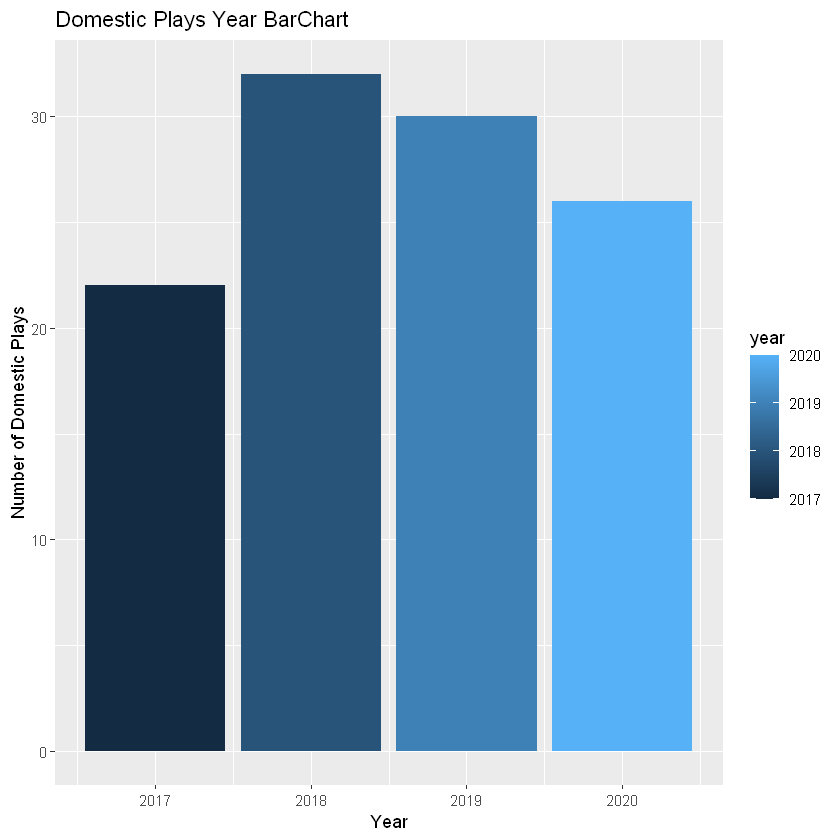

In [56]:
ggplot(df2, aes(x=year, y=domestic_play_number, fill=year))+
  geom_bar(stat = "identity") + 
  labs(title = "Domestic Plays Year BarChart", x="Year", y="Number of Domestic Plays")

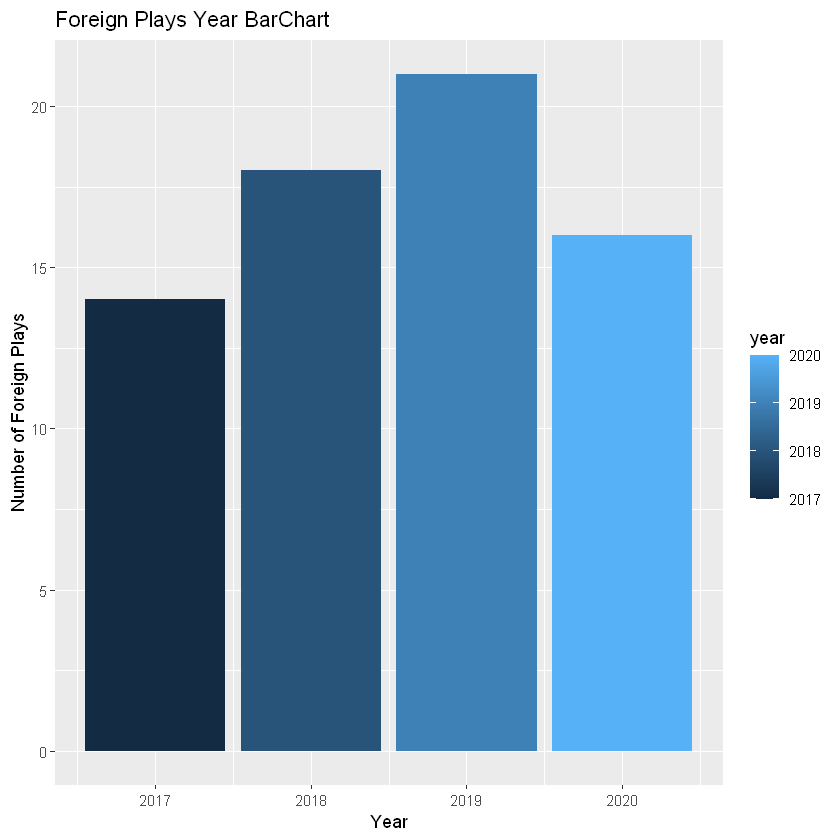

In [57]:
ggplot(df2, aes(x=year, y=foreign_play_number, fill=year))+
  geom_bar(stat = "identity") + 
  labs(title = "Foreign Plays Year BarChart", x="Year", y="Number of Foreign Plays")

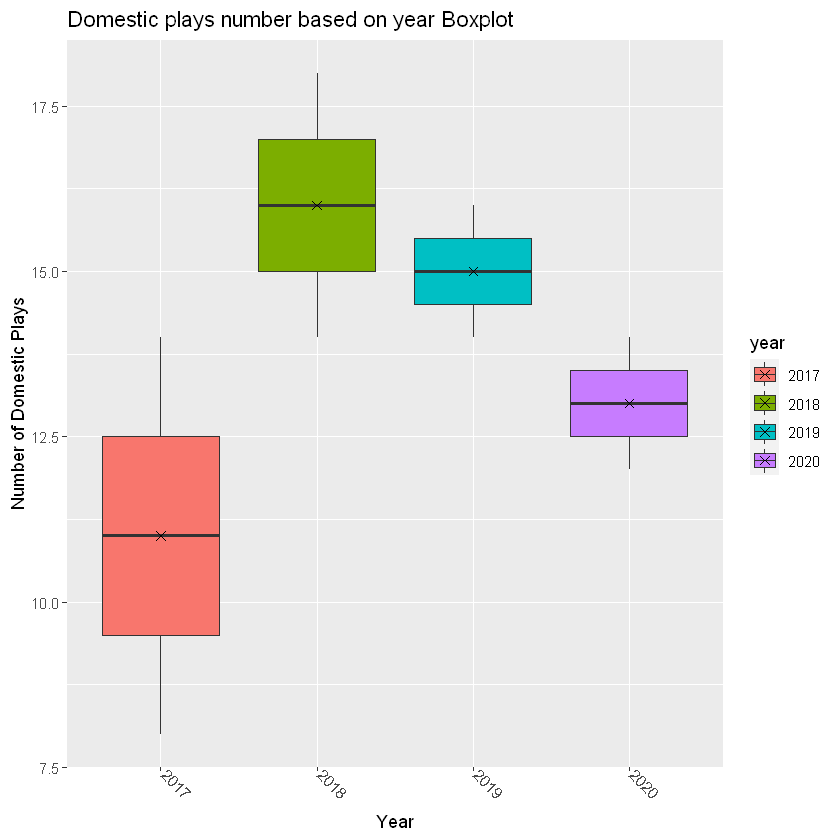

In [58]:
df2$year <- as.factor(df2$year)

ggplot(data=df2, aes(x=year, y=domestic_play_number, fill= year)) +
  geom_boxplot() + 
  labs(title = "Domestic plays number based on year Boxplot", x = "Year", y="Number of Domestic Plays") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

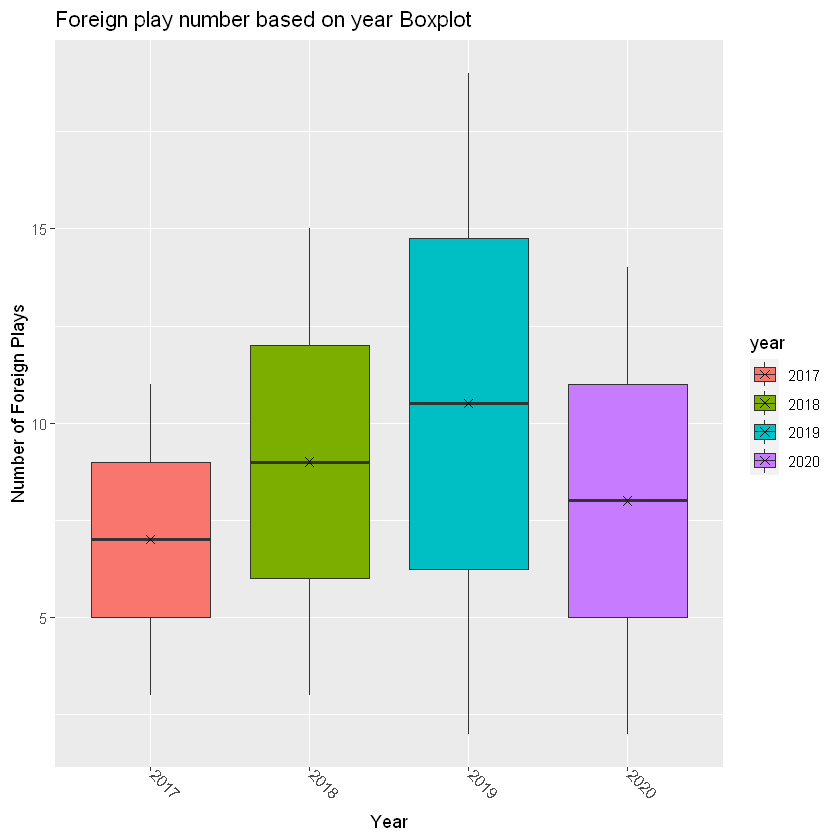

In [59]:
df2$year <- as.factor(df2$year)

ggplot(data=df2, aes(x=year, y=foreign_play_number, fill= year)) +
  geom_boxplot() + 
  labs(title = "Foreign play number based on year Boxplot", x = "Year", y="Number of Foreign Plays") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

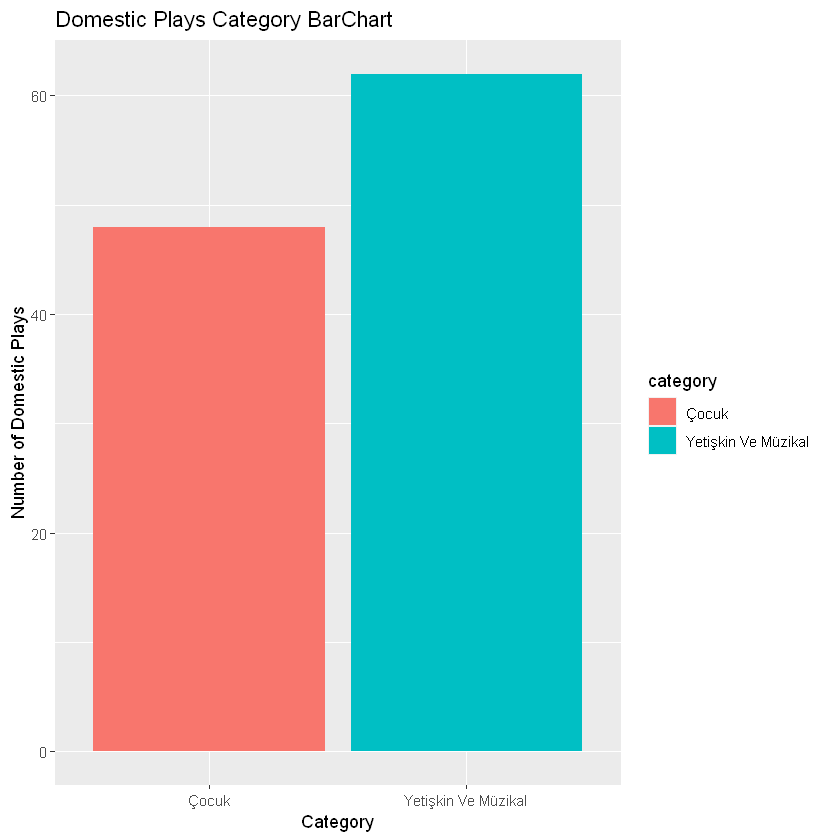

In [60]:
ggplot(df2, aes(x=category, y=domestic_play_number, fill=category))+
  geom_bar(stat = "identity") + 
  labs(title = "Domestic Plays Category BarChart", x="Category", y="Number of Domestic Plays")

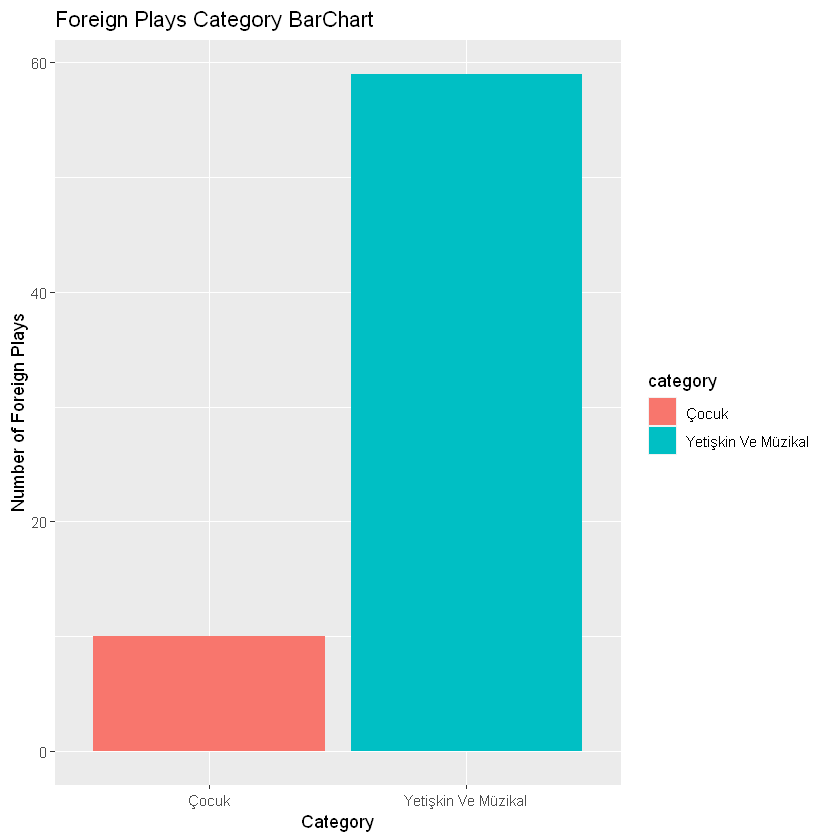

In [61]:
ggplot(df2, aes(x=category, y=foreign_play_number, fill=category))+
  geom_bar(stat = "identity") + 
  labs(title = "Foreign Plays Category BarChart", x="Category", y="Number of Foreign Plays")

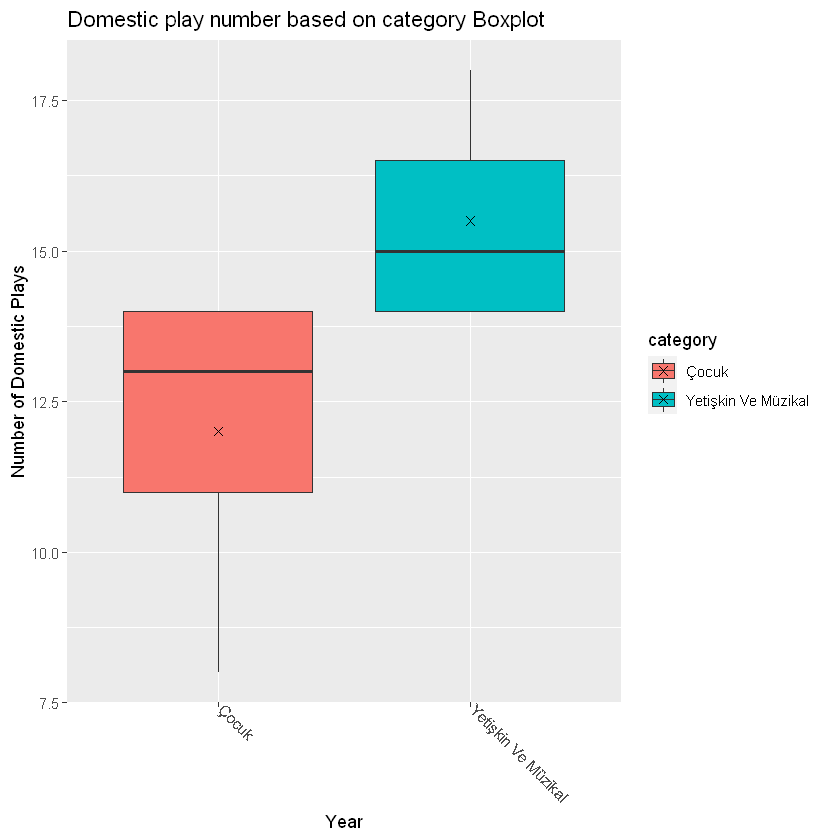

In [62]:
df2$category <- as.factor(df2$category)

ggplot(data=df2, aes(x=category, y=domestic_play_number, fill= category)) +
  geom_boxplot() + 
  labs(title = "Domestic play number based on category Boxplot", x = "Year", y="Number of Domestic Plays") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

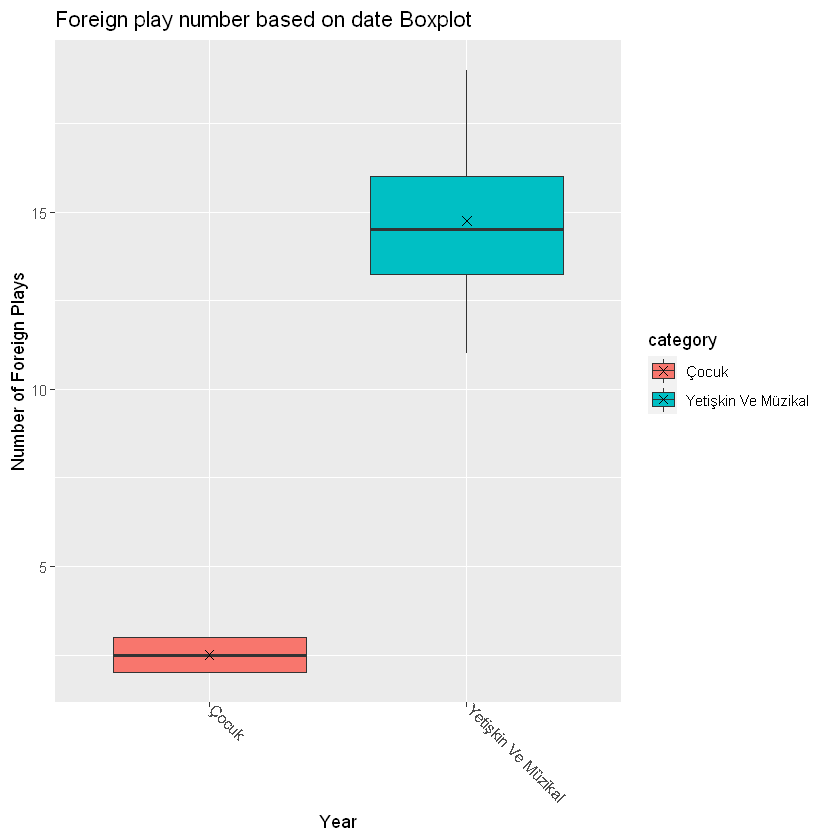

In [63]:
df2$category <- as.factor(df2$category)

ggplot(data=df2, aes(x=category, y=foreign_play_number, fill= category)) +
  geom_boxplot() + 
  labs(title = "Foreign play number based on date Boxplot", x = "Year", y="Number of Foreign Plays") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

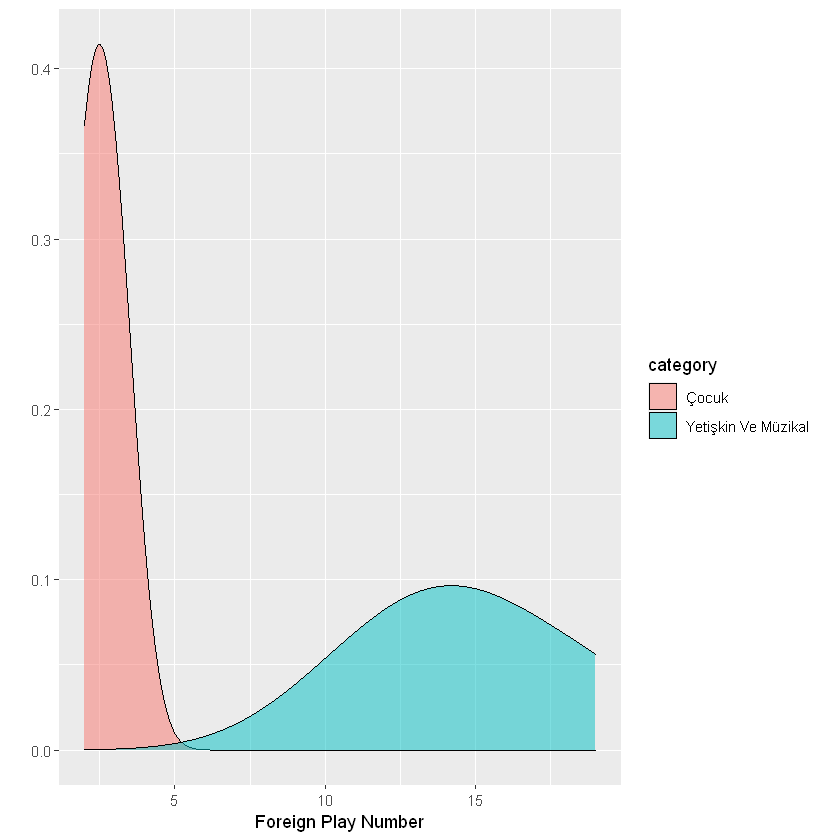

In [64]:
qplot(fill = category, 
      x = foreign_play_number, 
      data = df2, 
      geom = "density",
      alpha = I(0.5),
      adjust = 2
      )+labs( x = "Foreign Play Number") 

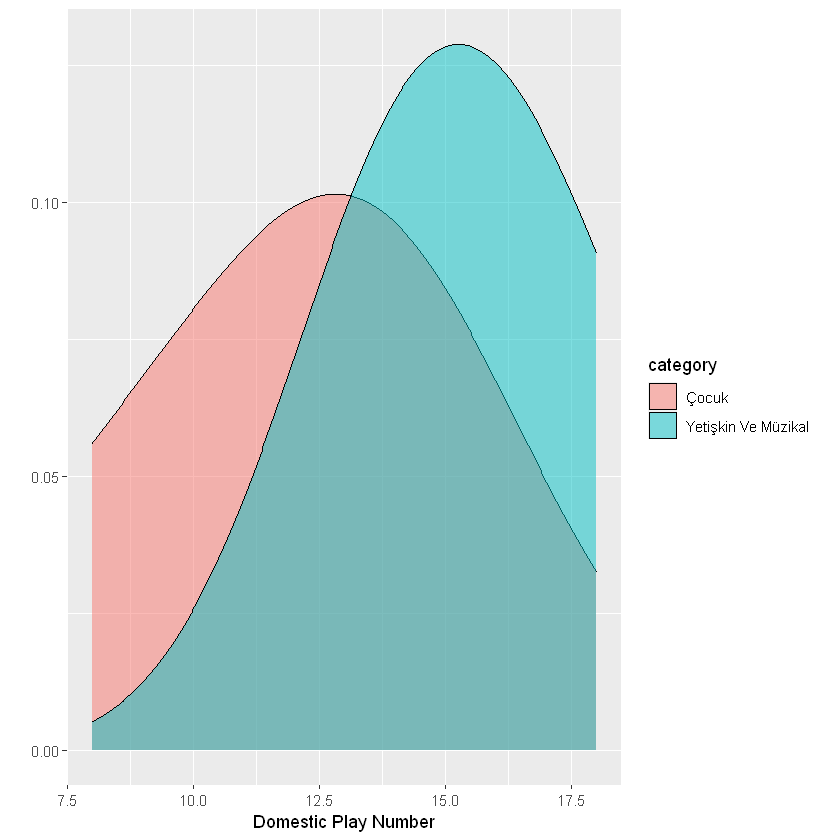

In [65]:
qplot(fill = category, 
      x = domestic_play_number, 
      data = df2, 
      geom = "density",
      alpha = I(0.5),
      adjust = 2
      )+labs( x = "Domestic Play Number")

### Confidence Interval

#### 1-) Confidence interval for foreign plays number evaluating the differences based on play category.

In [66]:
kid <- subset(df2, category == "Çocuk")
adultandmusical <- subset(df2, category == "Yetişkin Ve Müzikal")

In [67]:
x <- t.test(kid$foreign_play_number)$conf.int
x

[1] 1.581307 3.418693
attr(,"conf.level")
[1] 0.95

The true average of foreign plays number for kids is between 1.58 and 3.41 with 95% confidence.

In [68]:
y <- t.test(adultandmusical$foreign_play_number)$conf.int
y

[1]  9.492538 20.007462
attr(,"conf.level")
[1] 0.95

The true average of foreign plays number for adult ann musical is between 9.49 and 20.0 with 95% confidence.

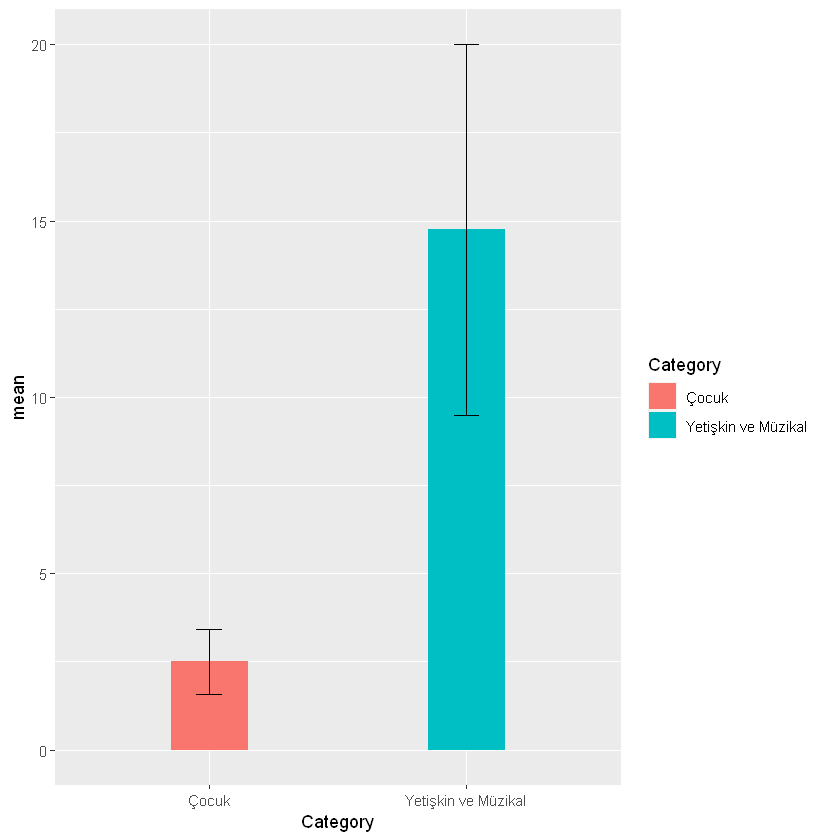

In [69]:
play.audience <- data.frame(Category ="Çocuk",
                                mean=mean(kid$foreign_play_number), 
                                lower=x[1], 
                                upper=x[2])

play.audience <- rbind(play.audience , data.frame(Category="Yetişkin ve Müzikal",
                                mean=mean(adultandmusical$foreign_play_number), 
                                lower=y[1], 
                                upper=y[2]))

ggplot(play.audience, aes(x=Category, y=mean, fill=Category)) +
  geom_bar(position="dodge", stat="identity", width = 0.3) +
  geom_errorbar(aes(ymin=lower, ymax=upper),
                width=.1, 
                position=position_dodge(0.1))

#### 2-) Confidence interval for domestic plays number evaluating the differences based on play category.

In [70]:
x <- t.test(kid$domestic_play_number)$conf.int
x

[1]  7.499341 16.500659
attr(,"conf.level")
[1] 0.95

The true average of domestic plays number for kid is between 7.49 and 16.50 with 95% confidence

In [71]:
x <- t.test(adultandmusical$domestic_play_number)$conf.int
x

[1] 12.45304 18.54696
attr(,"conf.level")
[1] 0.95

The true average of foreign plays number for adult and musical is between 12.45 and 18.54 with 95% confidence

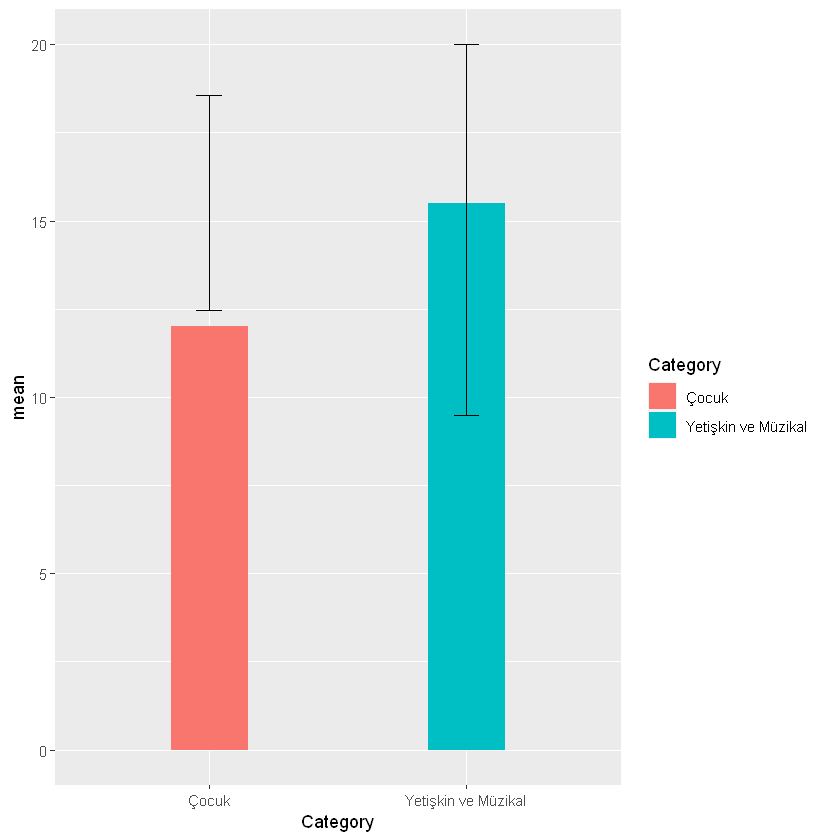

In [72]:
play.audience <- data.frame(Category ="Çocuk",
                                mean=mean(kid$domestic_play_number), 
                                lower=x[1], 
                                upper=x[2])

play.audience <- rbind(play.audience , data.frame(Category="Yetişkin ve Müzikal",
                                mean=mean(adultandmusical$domestic_play_number), 
                                lower=y[1], 
                                upper=y[2]))

ggplot(play.audience, aes(x=Category, y=mean, fill=Category)) +
  geom_bar(position="dodge", stat="identity", width = 0.3) +
  geom_errorbar(aes(ymin=lower, ymax=upper),
                width=.1, 
                position=position_dodge(0.1))

## Hypothesis testing

### One Sample Test

#### One sample hypothesis for foreign plays for kids is smaller than 3 and testing it with 95% confidence interval
H0:μ = 3

H1:μ > 3

In order to assess normality of data, we can use qqplot and Shapiro test.

In [73]:
shapiro.test(kid$foreign_play_number)


	Shapiro-Wilk normality test

data:  kid$foreign_play_number
W = 0.72863, p-value = 0.02386


As the p-value < 0.05, the null hypothesis is rejected, so data is not normally distributed.

Let’s visualize it using Q-Q Plot.



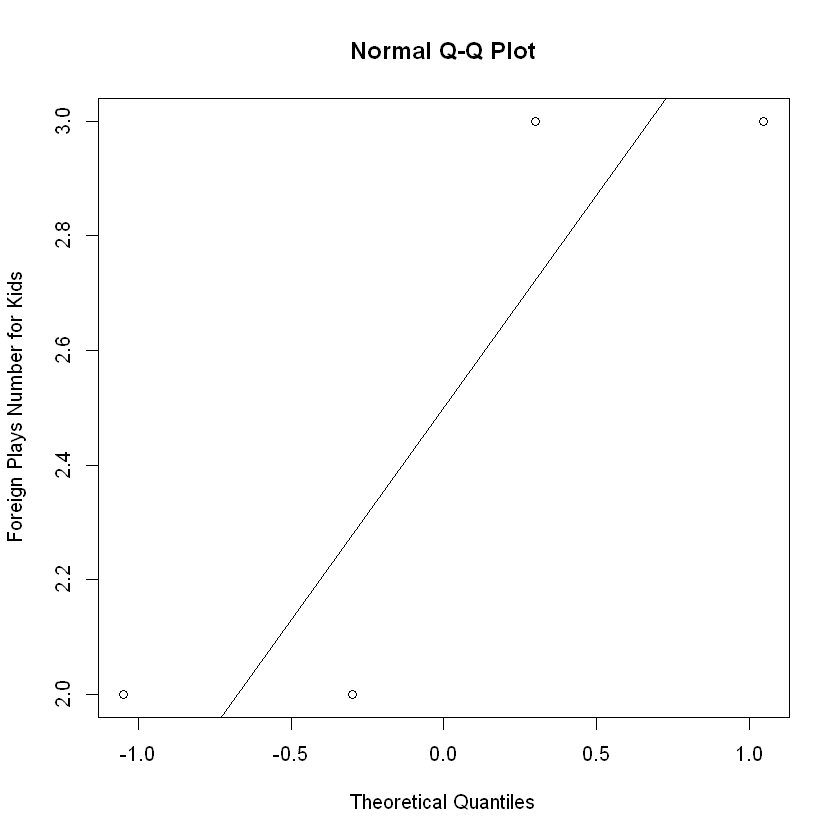

In [74]:
qqnorm(kid$foreign_play_number, ylab = "Foreign Plays Number for Kids")
qqline(kid$foreign_play_number)

Now we test the hypothesis;

In [75]:
t.test(kid$foreign_play_number, 
       alternative = "less", 
       mu=3, 
       conf.level = 0.95)


	One Sample t-test

data:  kid$foreign_play_number
t = -1.7321, df = 3, p-value = 0.09085
alternative hypothesis: true mean is less than 3
95 percent confidence interval:
     -Inf 3.179358
sample estimates:
mean of x 
      2.5 


To conclude, as p-value = 0.09 is greater than 0.05, the null hypothesis is not rejected. The confidence interval is between -infinity and 3.179358 with 95% confident.

### Two Sample Test

#### 1-) Are there significant difference between mean of kid and adult&musical foreign plays number?
Let’s check if the populations have the same variance.

In [76]:
x <- subset(df2, category=="Çocuk")$foreign_play_number
y <- subset(df2, category=="Yetişkin Ve Müzikal")$foreign_play_number
var.test(x, y)


	F test to compare two variances

data:  x and y
F = 0.030534, num df = 3, denom df = 3, p-value = 0.01716
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.001977718 0.471425416
sample estimates:
ratio of variances 
        0.03053435 


As the p-value < 0.05, the null hypothesis is rejected, so data is not normally distributed.

In [77]:
shapiro.test(adultandmusical$foreign_play_number)


	Shapiro-Wilk normality test

data:  adultandmusical$foreign_play_number
W = 0.97973, p-value = 0.9004


As the p-value > 0.05, the null hypothesis is not rejected, so data is normally distributed.

In [78]:
t.test(x=x, y=y, alternative = "two.sided", var.equal = TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  x and y
t = -7.3045, df = 6, p-value = 0.0003358
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.353596  -8.146404
sample estimates:
mean of x mean of y 
     2.50     14.75 


To conclude, as p-value < 0.05, the null hypothesis is rejected. We can conclude that there is statistically significant difference between musical&adult and kid foreign plays number.

#### 2-) Are there significant difference between mean of kid and adult&musical domestic plays number?
Let’s check if the populations have the same variance

In [79]:
x <- subset(df2, category=="Çocuk")$domestic_play_number
y <- subset(df2, category=="Yetişkin Ve Müzikal")$domestic_play_number
var.test(x, y)


	F test to compare two variances

data:  x and y
F = 2.1818, num df = 3, denom df = 3, p-value = 0.5382
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.141317 33.685489
sample estimates:
ratio of variances 
          2.181818 


As p-value > 0.05, the null hypothesis is not rejected.

In order to assess normality of data, we can use shapiro test.

In [80]:
shapiro.test(adultandmusical$domestic_play_number)


	Shapiro-Wilk normality test

data:  adultandmusical$domestic_play_number
W = 0.86337, p-value = 0.2725


As the p-value > 0.05, the null hypothesis is not rejected, so data is normally distributed.

In [81]:
shapiro.test(kid$domestic_play_number)


	Shapiro-Wilk normality test

data:  kid$domestic_play_number
W = 0.82743, p-value = 0.1612


As the p-value > 0.05, the null hypothesis is not rejected, so data is normally distributed

In [82]:
t.test(x=x, y=y, alternative = "two.sided", var.equal = TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  x and y
t = -2.0494, df = 6, p-value = 0.08631
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.6788975  0.6788975
sample estimates:
mean of x mean of y 
     12.0      15.5 


To conclude, as p-value > 0.05, the null hypothesis is not rejected. We can conclude that there is not statistically significant difference between musical&adult and kid domestic plays number.

### ANOVA

#### Are there significant difference between mean of number of foreign play for different play category?

In [83]:
data2 <- df2[, c(2, 4)]
names(data2) <- c( "domestic_play_number","category")
head(data2)

domestic_play_number,category
14,Yetişkin Ve Müzikal
18,Yetişkin Ve Müzikal
16,Yetişkin Ve Müzikal
14,Yetişkin Ve Müzikal
8,Çocuk
14,Çocuk


In [84]:
levels(data2$category)

[1] "Çocuk"               "Yetişkin Ve Müzikal"

In [85]:
group_by(data2, category) %>%
  summarise(
    count = n(),
    mean = mean(domestic_play_number, na.rm = TRUE),
    sd = sd(domestic_play_number, na.rm = TRUE)
  )

category,count,mean,sd
Çocuk,4,12.0,2.828427
Yetişkin Ve Müzikal,4,15.5,1.914854


##### Hypothesis:
H0: μ1=μ2

H1: μ1!=μ2

##### Visualization

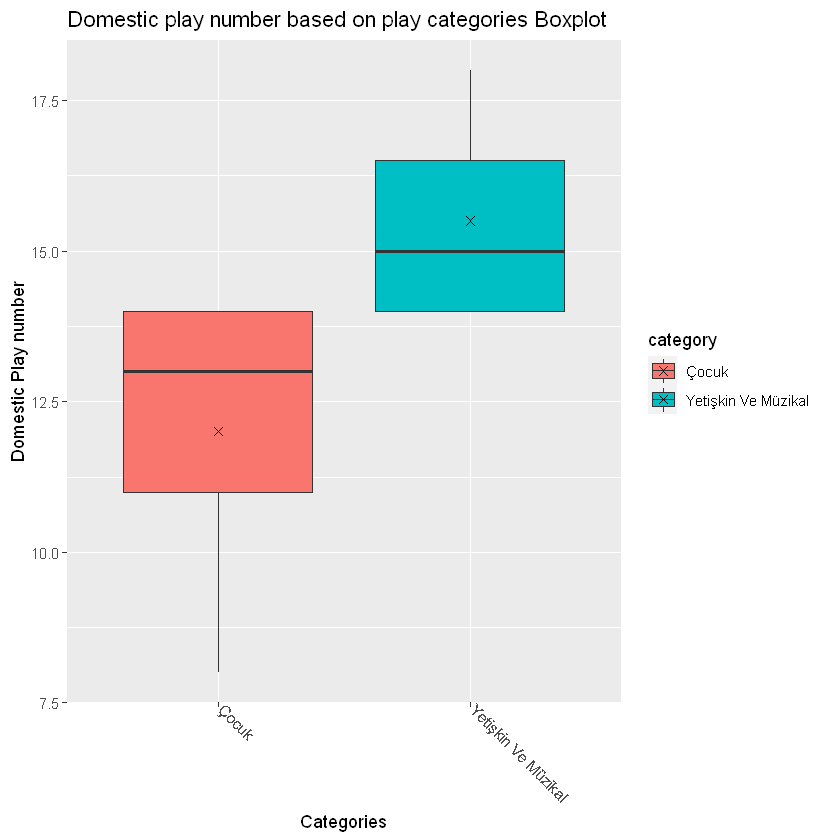

In [86]:
ggplot(data=data2, aes(x=category, y=domestic_play_number, fill= category)) +
  geom_boxplot() + 
  labs(title = "Domestic play number based on play categories Boxplot", x = "Categories", y="Domestic Play number") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

##### Normality Assumption
We will check normality assumption by Shapiro-test.

In [87]:
shapiro.test(data2[data2$category=="Çocuk", 1])


	Shapiro-Wilk normality test

data:  data2[data2$category == "Çocuk", 1]
W = 0.82743, p-value = 0.1612


In [88]:
shapiro.test(data2[data2$category=="Yetişkin Ve Müzikal", 1])


	Shapiro-Wilk normality test

data:  data2[data2$category == "Yetişkin Ve Müzikal", 1]
W = 0.86337, p-value = 0.2725


##### Variance homogeneity

In [89]:
bartlett.test(domestic_play_number~category, data=data2)


	Bartlett test of homogeneity of variances

data:  domestic_play_number by category
Bartlett's K-squared = 0.38174, df = 1, p-value = 0.5367


Based on output of barlett-test, p-value > 0.05 So, the null hypothesis is not rejected and variances are equal.

#### Analysis of variance

In [90]:
model<-aov(domestic_play_number~category, data=data2)
summary(model)

            Df Sum Sq Mean Sq F value Pr(>F)  
category     1   24.5  24.500     4.2 0.0863 .
Residuals    6   35.0   5.833                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value > 0.05, we can conclude that there is not significant differences between the categories plays audience number.

## Part 3 (Third Dataset)

### Data Exploration & Preprocessing

In [147]:
head(df3)

Repertuvar,Kategori,Oyun.Adı,Toplam.Adet,Seans.Sayısı,Doluluk.Oranı....
YERLİ OYUN,NORMAL OYUNLAR,AY IŞIĞINDA ŞAMATA,27.107,57,93
YERLİ OYUN,NORMAL OYUNLAR,FEHİM PAŞA KONAĞI,5.801,10,96
YERLİ OYUN,NORMAL OYUNLAR,GEÇ KALANLAR,26.497,97,88
YERLİ OYUN,NORMAL OYUNLAR,HAYAL-İ TEMSİL,30.482,89,88
YERLİ OYUN,NORMAL OYUNLAR,HİSSE-İ ŞAYİA (BİR EVLİLİK KOMEDİSİ),38.661,98,95
YERLİ OYUN,NORMAL OYUNLAR,SON,19.271,62,91


The third dataset consists of 6 columns. These are the type, category, name of the play, the number of tickets sold, the number of staging of the play and the occupancy rate of the theater.

In [148]:
colnames(df3) <- c("type", "category", "name","ticket_number","session_number","theater_occupancy_rate")

In [149]:
df3 <- transform(df3, category = as.factor(mapvalues(category, c("ÇOCUK OYUNU","MÜZİKAL OYUNLAR","NORMAL OYUNLAR"), c("ÇOCUK","MÜZİKAL","YETİŞKİN"))))

In [150]:
df3 <- transform(df3, type = as.factor(mapvalues(type, c("YABANCI OYUN","YERLİ OYUN"), c("YABANCI","YERLİ"))))

In [151]:
head(df3)

type,category,name,ticket_number,session_number,theater_occupancy_rate
YERLİ,YETİŞKİN,AY IŞIĞINDA ŞAMATA,27.107,57,93
YERLİ,YETİŞKİN,FEHİM PAŞA KONAĞI,5.801,10,96
YERLİ,YETİŞKİN,GEÇ KALANLAR,26.497,97,88
YERLİ,YETİŞKİN,HAYAL-İ TEMSİL,30.482,89,88
YERLİ,YETİŞKİN,HİSSE-İ ŞAYİA (BİR EVLİLİK KOMEDİSİ),38.661,98,95
YERLİ,YETİŞKİN,SON,19.271,62,91


In [152]:
summary(df3)

      type        category                           name    ticket_number    
 YABANCI:21   ÇOCUK   :20   12. GECE                   : 1   Min.   :  1.589  
 YERLİ  :46   MÜZİKAL : 7   ALAADDİN'İN SİHİRLİ LAMBASI: 1   1st Qu.:  8.414  
              YETİŞKİN:40   AMANVERMEZ AVNİ            : 1   Median : 19.551  
                            AŞK BİR ZAMANLAR (GAZALE)  : 1   Mean   : 34.554  
                            AY IŞIĞINDA ŞAMATA         : 1   3rd Qu.: 30.275  
                            AY, CARMELA!               : 1   Max.   :932.000  
                            (Other)                    :61                    
 session_number   theater_occupancy_rate
 Min.   :  3.00   Min.   : 53.00        
 1st Qu.: 20.00   1st Qu.: 80.50        
 Median : 62.00   Median : 89.00        
 Mean   : 59.99   Mean   : 86.81        
 3rd Qu.: 84.50   3rd Qu.: 94.50        
 Max.   :167.00   Max.   :108.00        
                                        

### Data visualization and Descriptive Stats

In [153]:
summary(df3$type)

YABANCI   YERLİ 
     21      46

In [154]:
summary(df3$category)

ÇOCUK  MÜZİKAL YETİŞKİN 
      20        7       40

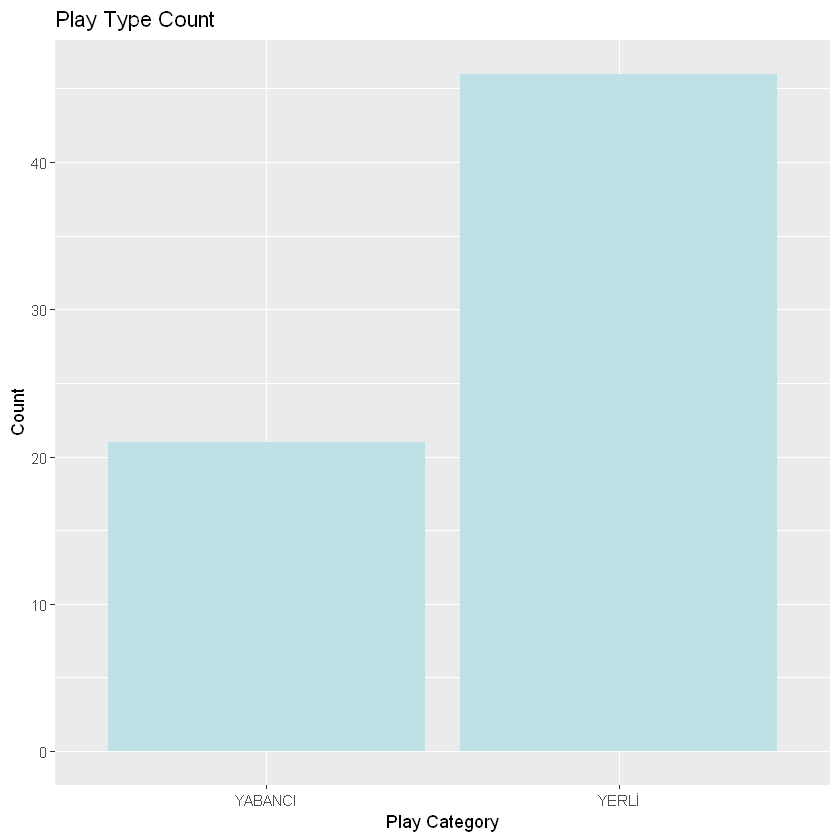

In [202]:
ggplot(data=df3, aes(x=type))+
  geom_bar(fill="#bee1e6")+
  labs(title = "Play Type Count", x="Play Category", y="Count")

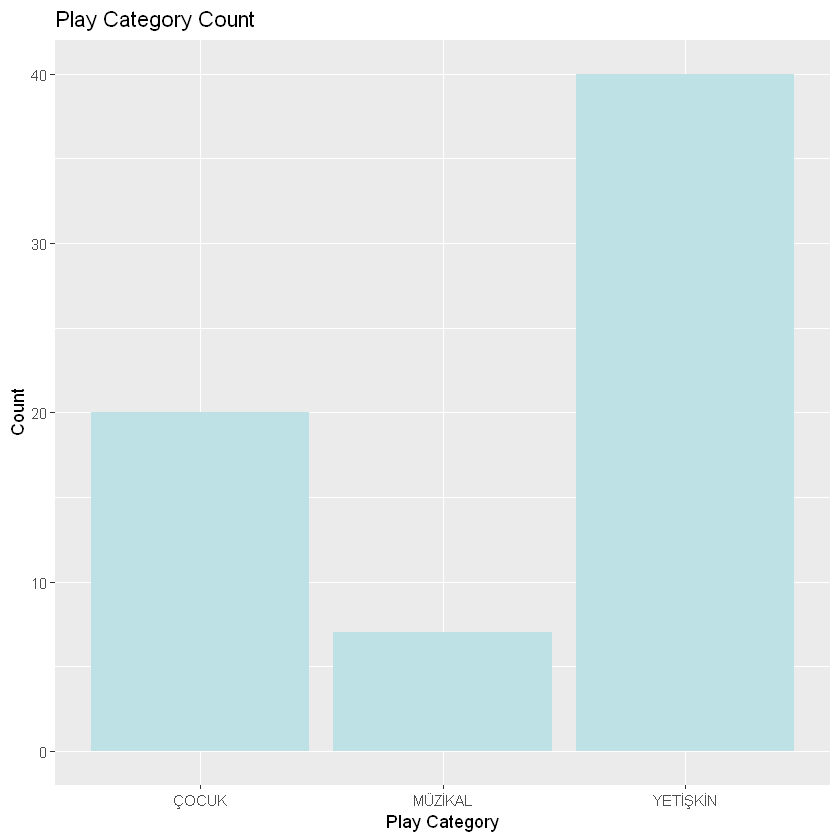

In [203]:
ggplot(data=df3, aes(x=category))+
  geom_bar(fill="#bee1e6")+
  labs(title = "Play Category Count", x="Play Category", y="Count")

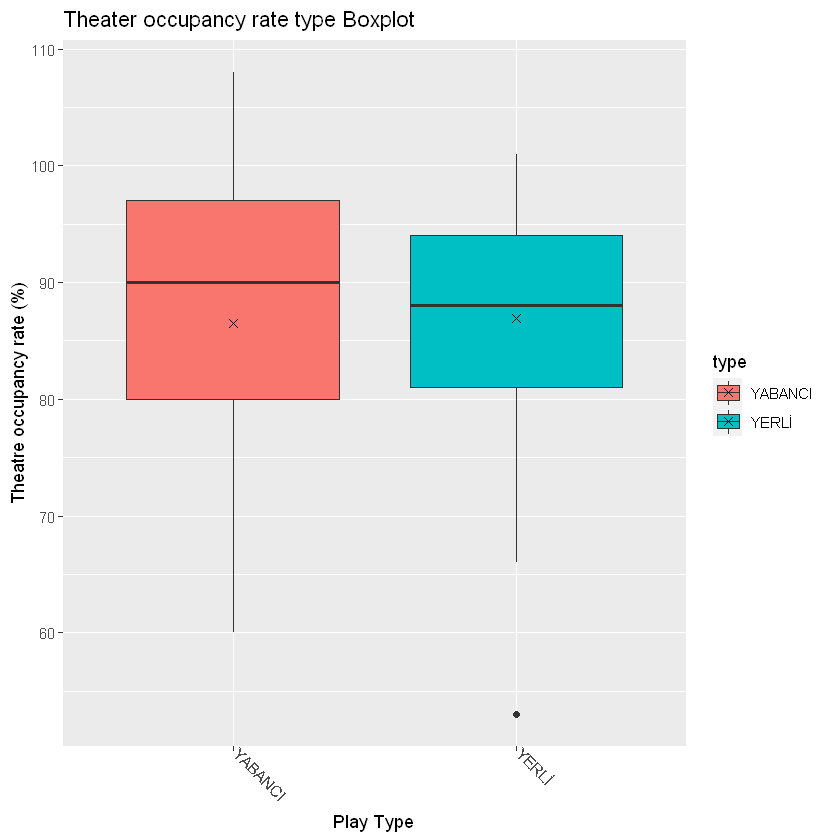

In [157]:
df3$type <- as.factor(df3$type)

ggplot(data=df3, aes(x=type, y=theater_occupancy_rate, fill= type)) +
  geom_boxplot() + 
  labs(title = "Theater occupancy rate type Boxplot", x = "Play Type", y="Theatre occupancy rate (%)") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

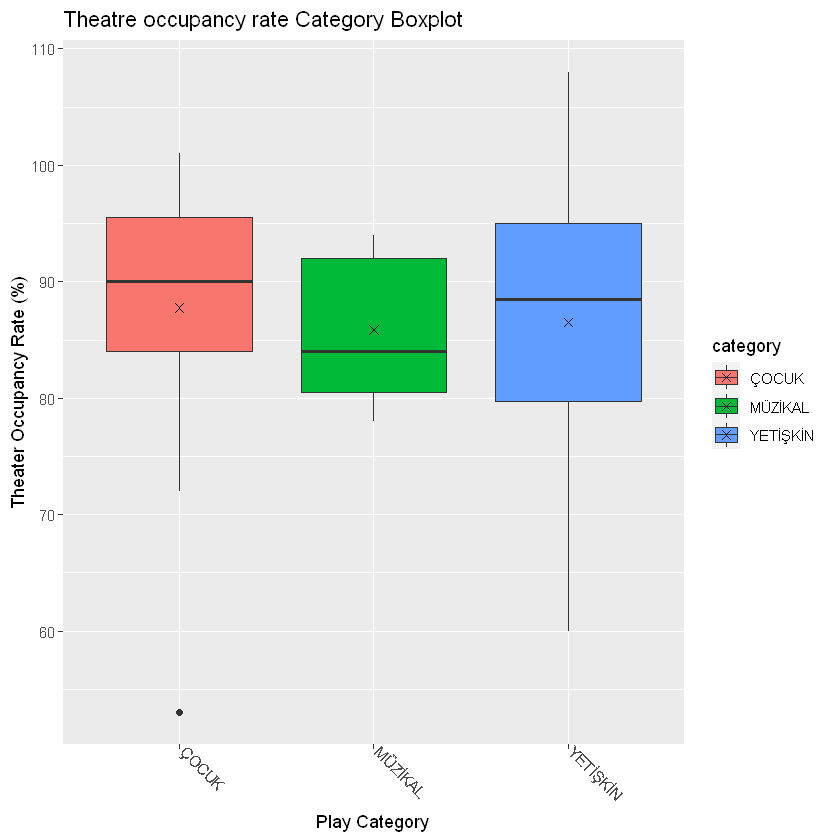

In [158]:
df3$category <- as.factor(df3$category)

ggplot(data=df3, aes(x=category, y=theater_occupancy_rate, fill= category)) +
  geom_boxplot() + 
  labs(title = "Theatre occupancy rate Category Boxplot", x = "Play Category", y="Theater Occupancy Rate (%)") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

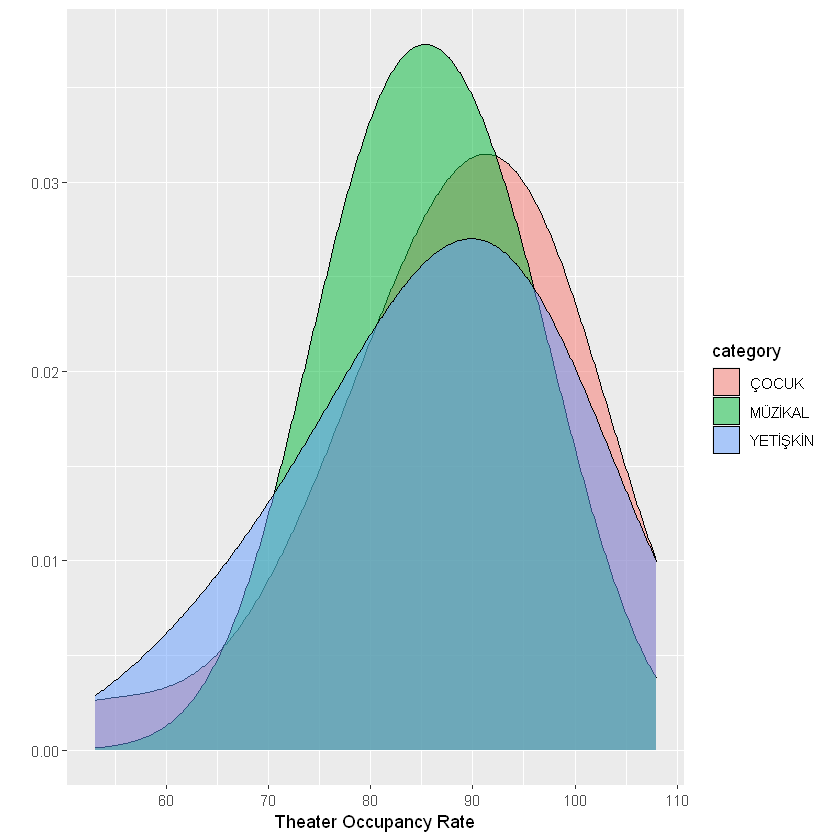

In [159]:
qplot(fill = category, 
      x = theater_occupancy_rate, 
      data = df3, 
      geom = "density",
      alpha = I(0.5),
      adjust = 2
      )+ labs( x = "Theater Occupancy Rate")

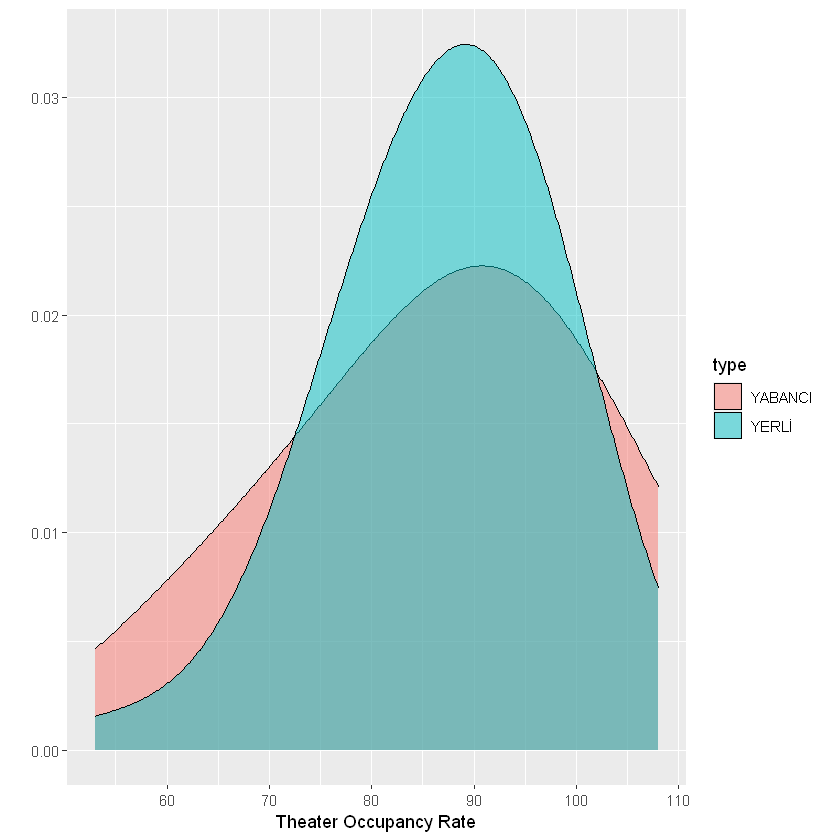

In [160]:
qplot(fill = type, 
      x = theater_occupancy_rate, 
      data = df3, 
      geom = "density",
      alpha = I(0.5),
      adjust = 2
      )+ labs( x = "Theater Occupancy Rate")

### Confidence Interval

#### 1-) Confidence interval for theater occupancy rate evaluating the differences based on play type.

In [161]:
domestic<- subset(df3, type=="YERLİ")
foreign<- subset(df3, type=="YABANCI")

In [162]:
x <- t.test(domestic$theater_occupancy_rate)$conf.int
x

[1] 84.01681 89.85276
attr(,"conf.level")
[1] 0.95

The true average of theater occupancy rate for domestic plays is between 84.01 and 89.85 with 95% confidence.

In [163]:
y <- t.test(foreign$theater_occupancy_rate)$conf.int
y

[1] 80.46165 92.58597
attr(,"conf.level")
[1] 0.95

The true average of theater occupancy rate for foreign plays is between 80.46 and 92.5 with 95% confidence.

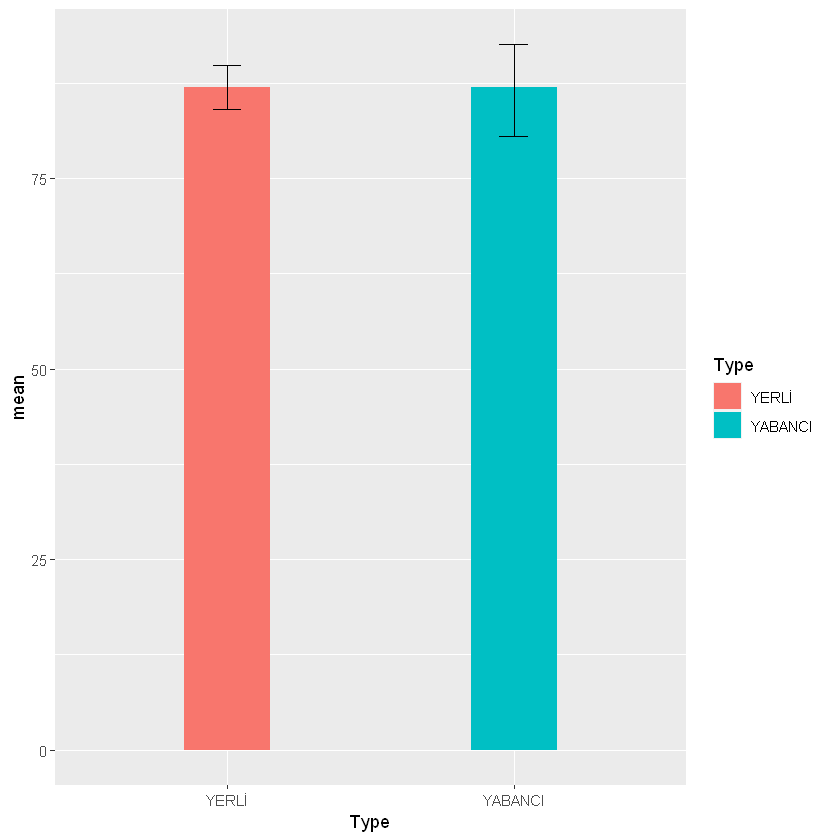

In [164]:
occupancy.rate <- data.frame(Type="YERLİ",
                                mean=mean(domestic$theater_occupancy_rate), 
                                lower=x[1], 
                                upper=x[2])

occupancy.rate <- rbind(occupancy.rate , data.frame(Type="YABANCI",
                                mean=mean(domestic$theater_occupancy_rate), 
                                lower=y[1], 
                                upper=y[2]))

ggplot(occupancy.rate, aes(x=Type, y=mean, fill=Type)) +
  geom_bar(position="dodge", stat="identity", width = 0.3) +
  geom_errorbar(aes(ymin=lower, ymax=upper),
                width=.1, 
                position=position_dodge(0.1))

#### 2-) Confidence interval for theater occupancy rate evaluating the differences based on play category.

In [165]:
kid<- subset(df3, category=="ÇOCUK")
adult<- subset(df3, category=="YETİŞKİN")
musical<- subset(df3, category=="MÜZİKAL")

In [166]:
x <- t.test(kid$theater_occupancy_rate)$conf.int
x

[1] 82.33261 93.16739
attr(,"conf.level")
[1] 0.95

The true average of theater occupancy rate for kid plays is between 82.33 and 93.16 with 95% confidence.

In [167]:
y <- t.test(adult$theater_occupancy_rate)$conf.int
y

[1] 82.8593 90.1407
attr(,"conf.level")
[1] 0.95

The true average of theater occupancy rate for adult plays is between 82.85 and 90.14 with 95% confidence.

In [168]:
z <- t.test(musical$theater_occupancy_rate)$conf.int
z

[1] 79.68930 92.02498
attr(,"conf.level")
[1] 0.95

The true average of theater occupancy rate for musical plays is between 79.68 and 92.02 with 95% confidence.

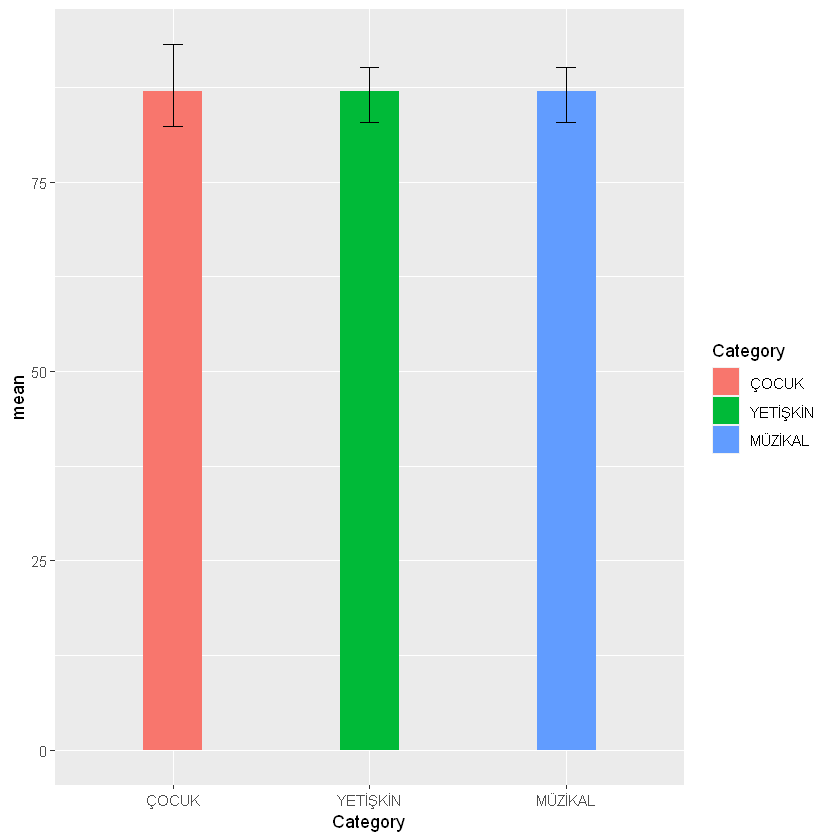

In [169]:
occupancy.rate <- data.frame(Category="ÇOCUK",
                                mean=mean(domestic$theater_occupancy_rate), 
                                lower=x[1], 
                                upper=x[2])

occupancy.rate <- rbind(occupancy.rate , data.frame(Category="YETİŞKİN",
                                mean=mean(domestic$theater_occupancy_rate), 
                                lower=y[1], 
                                upper=y[2]))

occupancy.rate <- rbind(occupancy.rate , data.frame(Category="MÜZİKAL",
                                mean=mean(domestic$theater_occupancy_rate), 
                                lower=y[1], 
                                upper=y[2]))

ggplot(occupancy.rate, aes(x=Category, y=mean, fill=Category)) +
  geom_bar(position="dodge", stat="identity", width = 0.3) +
  geom_errorbar(aes(ymin=lower, ymax=upper),
                width=.1, 
                position=position_dodge(0.1))

## Hypothesis Test

### One Sample Test
#### 1-) One sample hypothesis for theater occupancy rate of foreign plays smaller than 90% and testing it with 95% confidence interval.
H0: mu = 90

H1: mu < 90

In order to assess normality of data, we can use qqplot and shapiro test.

In [170]:
shapiro.test(foreign$theater_occupancy_rate)


	Shapiro-Wilk normality test

data:  foreign$theater_occupancy_rate
W = 0.93726, p-value = 0.1923


As the p-value > 0.05, the null hypothesis is not rejected, so data is normally distributed.

Let’s visualize it using Q-Q Plot.

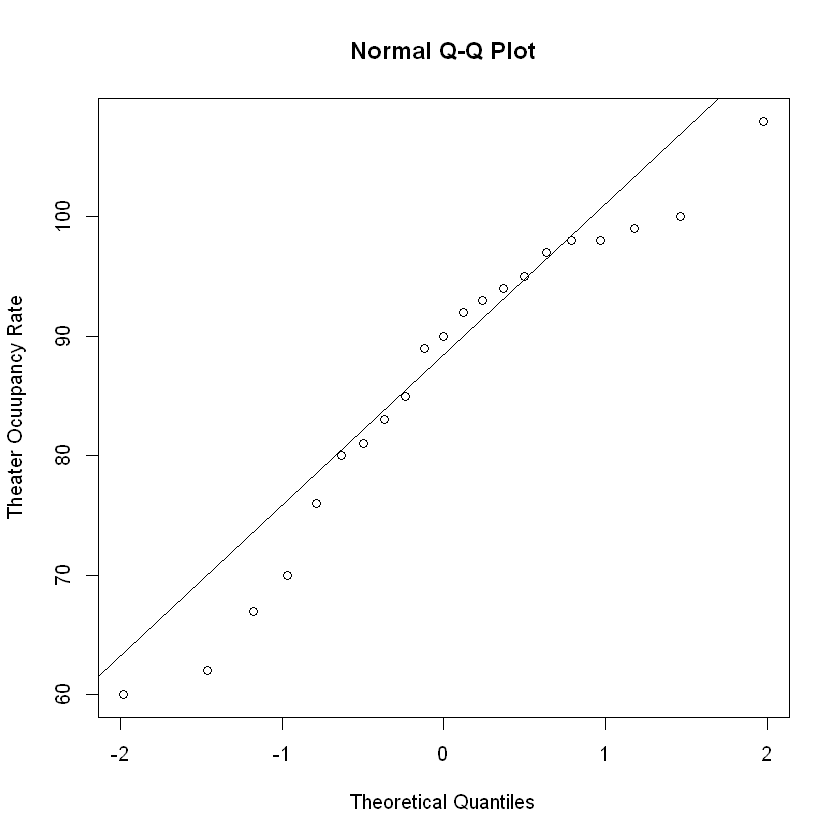

In [171]:
qqnorm(foreign$theater_occupancy_rate, ylab = "Theater Ocuupancy Rate")
qqline(foreign$theater_occupancy_rate)

In [172]:
t.test(foreign$theater_occupancy_rate, 
       alternative = "less", 
       mu=90, 
       conf.level = 0.95)


	One Sample t-test

data:  foreign$theater_occupancy_rate
t = -1.1961, df = 20, p-value = 0.1228
alternative hypothesis: true mean is less than 90
95 percent confidence interval:
     -Inf 91.53613
sample estimates:
mean of x 
 86.52381 


To conclude, as p-value = 0.1 is greater than 0.05, the null hypothesis is not rejected. The confidence interval is between -infinity and 91.53 with 95% confident.

#### 2-) One sample hypothesis for theater occupancy rate of kid plays is equal to 80% and testing it with 95% confidence interval.
H0:μ = 80

H1:μ != 80

In order to assess normality of data, we can use qqplot and Anderson-Darling test.

In [173]:
shapiro.test(kid$theater_occupancy_rate)


	Shapiro-Wilk normality test

data:  kid$theater_occupancy_rate
W = 0.88332, p-value = 0.02031


As the p-value < 0.05, the null hypothesis is rejected, so data is not normally distributed

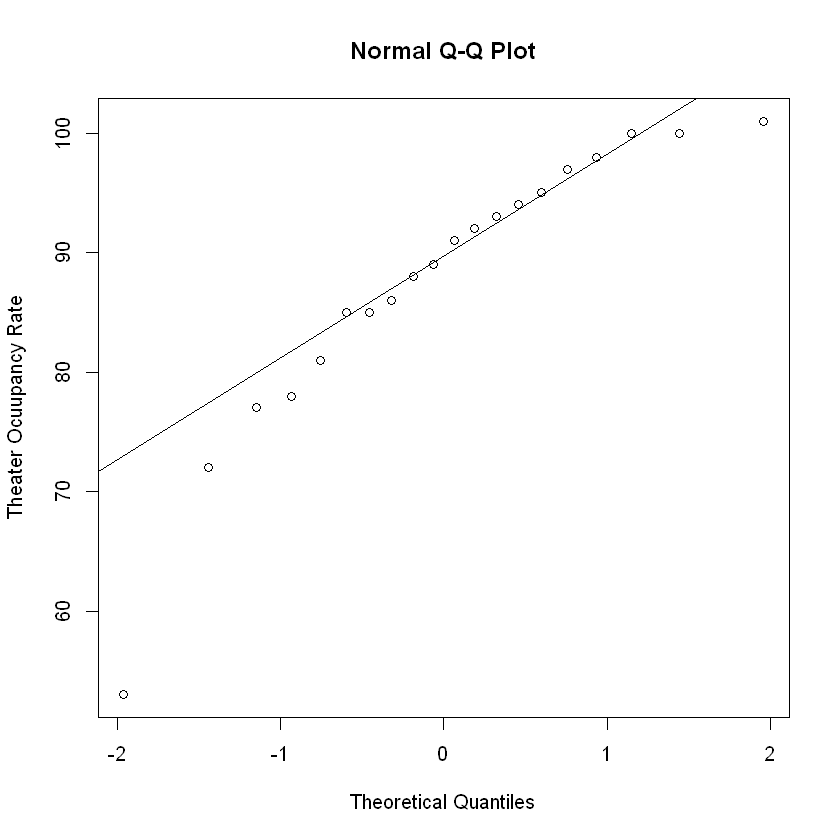

In [174]:
qqnorm(kid$theater_occupancy_rate, ylab = "Theater Ocuupancy Rate")
qqline(kid$theater_occupancy_rate)

In [175]:
t.test(kid$theater_occupancy_rate, 
       alternative = "two.sided", 
       mu=80, 
       conf.level = 0.95)


	One Sample t-test

data:  kid$theater_occupancy_rate
t = 2.9942, df = 19, p-value = 0.007456
alternative hypothesis: true mean is not equal to 80
95 percent confidence interval:
 82.33261 93.16739
sample estimates:
mean of x 
    87.75 


p-value = 0.007 is smaller than 0.05, the hypothesis is rejected. The confidence interval is between 82.33 and 93.16 with 95% confident.

### Two Sample Test

#### Are there significant difference between mean of domestic and foreign plays occupancy rate?
Let’s check if the populations have the same variance.

In [176]:
x <- subset(df3, type == "YERLİ")$theater_occupancy_rate
y <- subset(df3,  type == "YABANCI")$theater_occupancy_rate
var.test(x, y)


	F test to compare two variances

data:  x and y
F = 0.54437, num df = 45, denom df = 20, p-value = 0.09137
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2402018 1.1030050
sample estimates:
ratio of variances 
          0.544374 


In [177]:
df3 %>%
  group_by(type) %>%
  summarize(num.obs = n(),
            mean.df = mean(theater_occupancy_rate),
            sd.df = sd(theater_occupancy_rate),
            se.df = sd(theater_occupancy_rate) / sqrt(num.obs))

type,num.obs,mean.df,sd.df,se.df
YABANCI,21,86.52381,13.317729,2.906167
YERLİ,46,86.93478,9.826047,1.448772


In order to assess normality of data, we can use qqplot and shapiro test.

In [178]:
shapiro.test(domestic$theater_occupancy_rate)


	Shapiro-Wilk normality test

data:  domestic$theater_occupancy_rate
W = 0.93227, p-value = 0.01017


As the p-value < 0.05, the null hypothesis is rejected, so data is not normally distributed

In [179]:
shapiro.test(foreign$theater_occupancy_rate)


	Shapiro-Wilk normality test

data:  foreign$theater_occupancy_rate
W = 0.93726, p-value = 0.1923


As the p-value > 0.05, the null hypothesis is not rejected, so data is normally distributed

In [180]:
t.test(x=x, y=y, alternative = "two.sided", var.equal = TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  x and y
t = 0.14162, df = 65, p-value = 0.8878
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.384580  6.206527
sample estimates:
mean of x mean of y 
 86.93478  86.52381 


p-value > 0.05, the null hypothesis is not rejected,We can conclude that there is not statistically significant difference between Domestic and Foreign plays theater ocuupancy rate.

### Anova

#### 1-) Are there significant difference between mean of theater occupancy rate for different play type?

In [181]:
data3 <- df3[, c(1, 6)]
names(data2) <- c( "type","theater_occupancy_rate")
head(data3)

type,theater_occupancy_rate
YERLİ,93
YERLİ,96
YERLİ,88
YERLİ,88
YERLİ,95
YERLİ,91


In [182]:
levels(data3$type)

[1] "YABANCI" "YERLİ"

In [183]:
group_by(data3, type) %>%
  summarise(
    count = n(),
    mean = mean(theater_occupancy_rate, na.rm = TRUE),
    sd = sd(theater_occupancy_rate, na.rm = TRUE)
  )

type,count,mean,sd
YABANCI,21,86.52381,13.317729
YERLİ,46,86.93478,9.826047


#### Hypothesis:
H0: μ1=μ2

H1:μ1!=μ2

#### Visulation

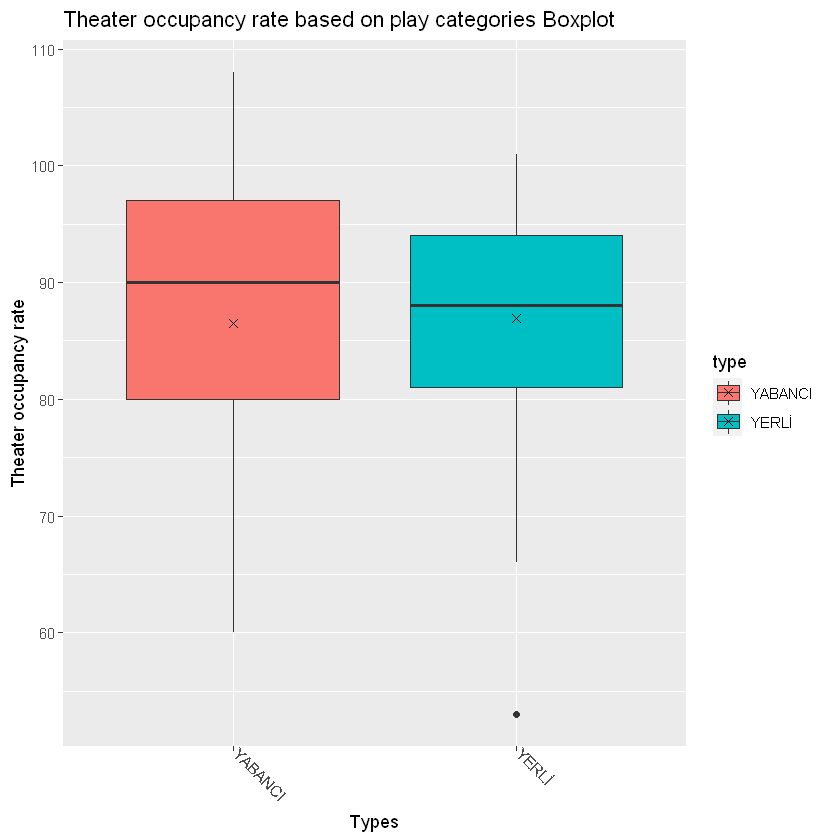

In [184]:
ggplot(data=data3, aes(x=type, y=theater_occupancy_rate, fill= type)) +
  geom_boxplot() + 
  labs(title = "Theater occupancy rate based on play categories Boxplot", x = "Types", y="Theater occupancy rate") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

#### Variance homogeneity

In [185]:
bartlett.test(theater_occupancy_rate~type, data=data3)


	Bartlett test of homogeneity of variances

data:  theater_occupancy_rate by type
Bartlett's K-squared = 2.6815, df = 1, p-value = 0.1015


Based on output of barlett-test, p-value > 0.05 So, the null hypothesis is not rejected.

#### Analysis of variance

In [186]:
model<-aov(theater_occupancy_rate~type, data=data3)
summary(model)

            Df Sum Sq Mean Sq F value Pr(>F)
type         1      2    2.44    0.02  0.888
Residuals   65   7892  121.42               

The p-value > 0.05, we can conclude that there is not significant differences between the types plays theater occupancy rate.

##### 2-) Are there significant difference between mean of theater occupancy rate for different play category?

In [187]:
data3 <- df3[, c(2, 6)]
names(data2) <- c( "category","theater_occupancy_rate")
head(data3)

category,theater_occupancy_rate
YETİŞKİN,93
YETİŞKİN,96
YETİŞKİN,88
YETİŞKİN,88
YETİŞKİN,95
YETİŞKİN,91


In [188]:
levels(data3$category)

[1] "ÇOCUK"    "MÜZİKAL"  "YETİŞKİN"

In [189]:
group_by(data3, category) %>%
  summarise(
    count = n(),
    mean = mean(theater_occupancy_rate, na.rm = TRUE),
    sd = sd(theater_occupancy_rate, na.rm = TRUE)
  )

category,count,mean,sd
ÇOCUK,20,87.75000,11.575269
MÜZİKAL,7,85.85714,6.669047
YETİŞKİN,40,86.50000,11.383749


##### Hypothesis:
H0: μ1=μ2 =μ3

H1:At least one different

##### Visulation

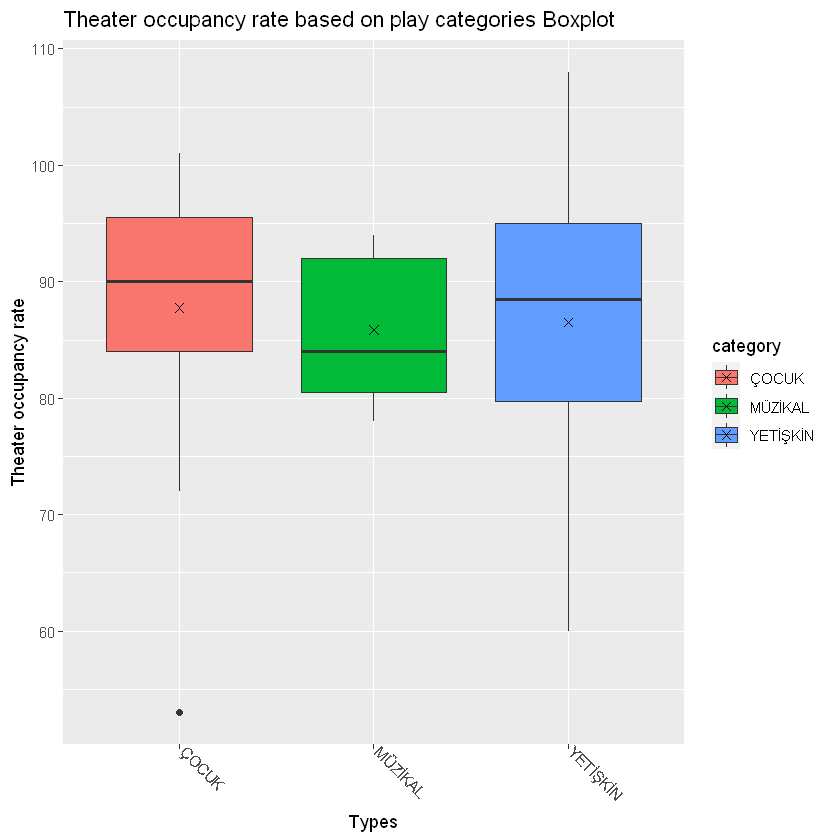

In [190]:
ggplot(data=data3, aes(x=category, y=theater_occupancy_rate, fill= category)) +
  geom_boxplot() + 
  labs(title = "Theater occupancy rate based on play categories Boxplot", x = "Types", y="Theater occupancy rate") +
  stat_summary(fun=mean, geom="point", shape=4, size=2) +
  theme(axis.text.x=element_text(angle=-45,hjust=0,vjust=0))

##### Variance homogeneity

In [191]:
bartlett.test(theater_occupancy_rate~category, data=data3)


	Bartlett test of homogeneity of variances

data:  theater_occupancy_rate by category
Bartlett's K-squared = 2.3103, df = 2, p-value = 0.315


Based on output of barlett-test, p-value > 0.05 So, the null hypothesis is not rejected.

##### Analysis of variance

In [192]:
model<-aov(theater_occupancy_rate~category, data=data3)
summary(model)

            Df Sum Sq Mean Sq F value Pr(>F)
category     2     28   13.94   0.113  0.893
Residuals   64   7867  122.92               

The p-value > 0.05, we can conclude that there is not significant differences between the categories plays theater occupancy rate.

### Result
•There is a certain difference in the number of audiences according to the category of the play played in the theater. Musical plays were watched by more audiences than kid and adult plays.

•The fact that the plays were domestic or foreign did not affect the number of audiences.

•Domestic plays were played more than foreign plays.

•The theater occupancy rate in all three play categories is between 85% and 90%, so there is not significant difference.

•Foreign kid plays are less with a big difference compared to adult and musical plays. So very few foreign kid plays are played.

•While the number of foreign plays increased by one level every year, it decreased in 2020.

### Discussion

I think that the reason why the occupancy rates of the theaters are almost equal, while the number of audiences in musical plays is higher than that of adult and kid plays, is because musical plays are performed on larger stages, hence in halls.

I also think that the number of audiences is higher due to the fact that musical plays are less than other plays.In other words, because it is less frequent, it attracts the audience more.

The fact that the number of foreign plays played has been increasing rapidly every year and has decreased in 2020 is undoubtedly the effect of the pandemic. But this drop was less than I expected.

In addition, I think that the main reason for the balance between the two play types is that the audiences does not care about whether they are local or foreign when choosing the play they will go to.

If this study was done again, the categories of theater plays should be handled in more detail because for example, 'Adult' is very general, It can be more specific like comedy, drama, etc. 
In addition, we can better understand that the theater is how much interested by the audience by adding the number of seats in the theater.